# Script to plot all important information for LINELIST

## Author(s): Sven Buder (SB, WG4)

### History:
190107 SB Created

In [174]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import pandas
from astropy.table import Table, hstack, vstack
import astropy.io.fits as pyfits

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
matplotlib.warnings.filterwarnings(action='ignore')

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [175]:
linelist = Table.read('../../../trunk/GALAH/LINELIST/galah_master_v5.1.fits',1)

In [176]:
test_sobject_ids = [150405000901378, 150210005801171]

def read_spectra(sobject_id, iraf_dr = 'dr5.3', SPECTRA = 'SPECTRA', format='standard'):
    """
    This function reads in the 4 individual spectra from the subdirectory working_directory/SPECTRA
    
    INPUT:
    sobject_id = identifier of spectra by date (6digits), plate (4digits), combination (2digits) and pivot number (3digits)
    iraf_dr = reduction which shall be used, current version: dr5.3
    SPECTRA = string to indicate sub directory where spectra are saved
    
    OUTPUT
    spectrum = dictionary
    """
    
    spectrum = dict(sobject_id = sobject_id)
    
    # Assess if spectrum is stacked
    if str(sobject_id)[11] == '1':
        # Single observations are saved in 'com'
        com='com'
    else:
        # Stacked observations are saved in 'com2'
        com='com'   
    
    # Iterate through all 4 CCDs
    for each_ccd in [1,2,3,4]:
        
        try:
            fits = pyfits.open(SPECTRA+'/'+iraf_dr+'/'+str(sobject_id)[0:6]+'/standard/'+com+'/'+str(sobject_id)+str(each_ccd)+'.fits')
        except:
            fits = pyfits.open(SPECTRA+'/'+str(sobject_id)+str(each_ccd)+'.fits')
            
        # Extension 0: Reduced spectrum
        # Extension 1: Relative error spectrum
        # Extension 4: Normalised spectrum, NB: cut for CCD4
        
        # Extract wavelength grid for the reduced spectrum
        start_wavelength = fits[0].header["CRVAL1"]
        dispersion       = fits[0].header["CDELT1"]
        nr_pixels        = fits[0].header["NAXIS1"]
        reference_pixel  = fits[0].header["CRPIX1"]
        if reference_pixel == 0:
            reference_pixel = 1
        spectrum['wave_red_'+str(each_ccd)] = np.array(map(lambda x:((x-reference_pixel+1)*dispersion+start_wavelength),range(0,nr_pixels)))

        # Extract wavelength grid for the normalised spectrum
        start_wavelength = fits[4].header["CRVAL1"]
        dispersion       = fits[4].header["CDELT1"]
        nr_pixels        = fits[4].header["NAXIS1"]
        reference_pixel  = fits[4].header["CRPIX1"]
        if reference_pixel == 0:
            reference_pixel=1
        spectrum['wave_norm_'+str(each_ccd)] = np.array(map(lambda x:((x-reference_pixel+1)*dispersion+start_wavelength),range(0,nr_pixels)))
        
        # Extract flux and flux error of reduced spectrum
        spectrum['sob_red_'+str(each_ccd)]  = np.array(fits[0].data)
        spectrum['uob_red_'+str(each_ccd)]  = np.array(fits[0].data * fits[1].data)

        # Extract flux and flux error of reduced spectrum
        spectrum['sob_norm_'+str(each_ccd)] = np.array(fits[4].data)
        if each_ccd != 4:
            spectrum['uob_norm_'+str(each_ccd)] = np.array(fits[4].data * fits[1].data)
        else:
            # for normalised error of CCD4, only used appropriate parts of error spectrum
            spectrum['uob_norm_4'] = np.array(fits[4].data * (fits[1].data)[-len(spectrum['sob_norm_4']):])
            
        fits.close()
        
    spectrum['wave_norm'] = np.concatenate((spectrum['wave_norm_1'],spectrum['wave_norm_2'],spectrum['wave_norm_3'],spectrum['wave_norm_4']))
    spectrum['sob_norm'] = np.concatenate((spectrum['sob_norm_1'],spectrum['sob_norm_2'],spectrum['sob_norm_3'],spectrum['sob_norm_4']))
    spectrum['uob_norm'] = np.concatenate((spectrum['uob_norm_1'],spectrum['uob_norm_2'],spectrum['uob_norm_3'],spectrum['uob_norm_4']))
    
    return spectrum

def read_all_spectra(test_sobject_ids, directory='../../../trunk/GALAH/SPECTRA/linelist'):
    spectra = {}
    
    for each_sobject_id in test_sobject_ids:
        spectra[each_sobject_id] = read_spectra(each_sobject_id, SPECTRA = directory)
        
    return spectra

spectra = read_all_spectra(test_sobject_ids)

In [209]:
def plot_information(name_0, name_1, linelist, test_sobject_ids, wl_left = 1, wl_right = 1):
    """
    This function finds all entries in the GALAH linelist
    for a given atom/molecule (name[0] and name[1]) within the GALAH wavelength range
    and prints
    lambda, e_low, log_gf, log_gf_ref,
    and the lines for selected spectra
    
    INPUT: 
    name_0: linelist.name[0] aka atom (or first part of molecule name)
    name_1: linelist.name[1] (second part of molecule name)
    linelist: FITS file
    test_sobject_id: sobject_ids to use for plotting
    wl_left: extension [in Å] of plotrange towards bluer wavelengths
    wl_right: extension [in Å] of plotrange towards redder wavelengths
    """

    plt.rcParams['text.usetex'] = False
    
    identified_lines = np.where(
        ((linelist['NAME'].T)[0] == name_0) & 
        ((linelist['NAME'].T)[1] == name_1) & 
        (
        (linelist['LAMBDA'] >= 4713) & (linelist['LAMBDA'] <= 4903) |
        (linelist['LAMBDA'] >= 5648) & (linelist['LAMBDA'] <= 5873) |
        (linelist['LAMBDA'] >= 6478) & (linelist['LAMBDA'] <= 673) |
        (linelist['LAMBDA'] >= 7585) & (linelist['LAMBDA'] <= 7887)
        )
    )[0]
    
    print(np.array(linelist['LAMBDA'][identified_lines]))
    
    for each_line in identified_lines:
        
        #print('lambda   , log_gf+log_gf_ref')
        #print("{:.4f}".format(linelist[each_line]['LAMBDA']), "{:.3f}".format(linelist[each_line]['LOG_GF']), linelist[each_line]['LOG_GF_REF'])
        
        f = plt.figure(figsize=(15,3))
        for each_index, each_sobject_id in enumerate(test_sobject_ids):
        
            ax = plt.subplot(int(np.round(len(test_sobject_ids)/2)),2,each_index+1)
            
            line_center = linelist[each_line]['LAMBDA']
            
            in_range = (
                (spectra[each_sobject_id]['wave_norm'] >= line_center - wl_left) & 
                (spectra[each_sobject_id]['wave_norm'] <= line_center + wl_right)
            )
            
            ax.plot(
                spectra[each_sobject_id]['wave_norm'][in_range],
                spectra[each_sobject_id]['sob_norm'][in_range]
            )
            ax.axvline(line_center,color='r')
            ax.set_ylim(-0.1,1.1)
            ax.set_xlim(line_center - 1.1*wl_left, line_center + 1.1*wl_right)
            text_kwargs = dict(fontsize=12,transform=ax.transAxes, ha='left')
            ax.text(0.01,0.25,'lambda = '+str("{:.4f}".format(line_center)),**text_kwargs)
            ax.text(0.01,0.175,'e_low = '+str(linelist[each_line]['E_LOW']),**text_kwargs)
            ax.text(0.01,0.1,'log_gf = '+str(linelist[each_line]['LOG_GF']),**text_kwargs)
            ax.text(0.01,0.025,'log_gf_ref = '+linelist[each_line]['LOG_GF_REF'],**text_kwargs)

[ 4730.0286  4739.593   4739.593   4739.709   4851.07    4851.099   4851.099
  4868.823   4868.866   5711.088   5785.313   5785.561   5785.672   7589.553
  7589.553   7594.84    7596.741   7596.741   7600.639   7600.639   7600.639
  7602.456   7602.456   7602.456   7602.467   7602.467   7602.467   7602.467
  7602.474   7623.4     7627.325   7655.111   7655.111   7655.111   7655.122
  7655.122   7655.122   7655.122   7655.129   7657.603   7659.152   7659.901
  7663.245   7665.181   7665.181   7669.149   7669.149   7669.149   7690.123
  7691.55    7691.553   7699.67    7703.674   7722.583   7722.583   7722.583
  7722.593   7722.593   7722.593   7722.593   7722.601   7726.18    7726.18
  7753.255   7755.236   7755.236   7759.298   7759.298   7759.298   7786.499
  7790.977   7801.041   7805.151   7811.122   7811.122   7811.122   7811.133
  7811.133   7811.133   7811.133   7811.141   7875.43    7877.054   7877.48
  7877.48    7881.667   7881.67    7881.67  ]


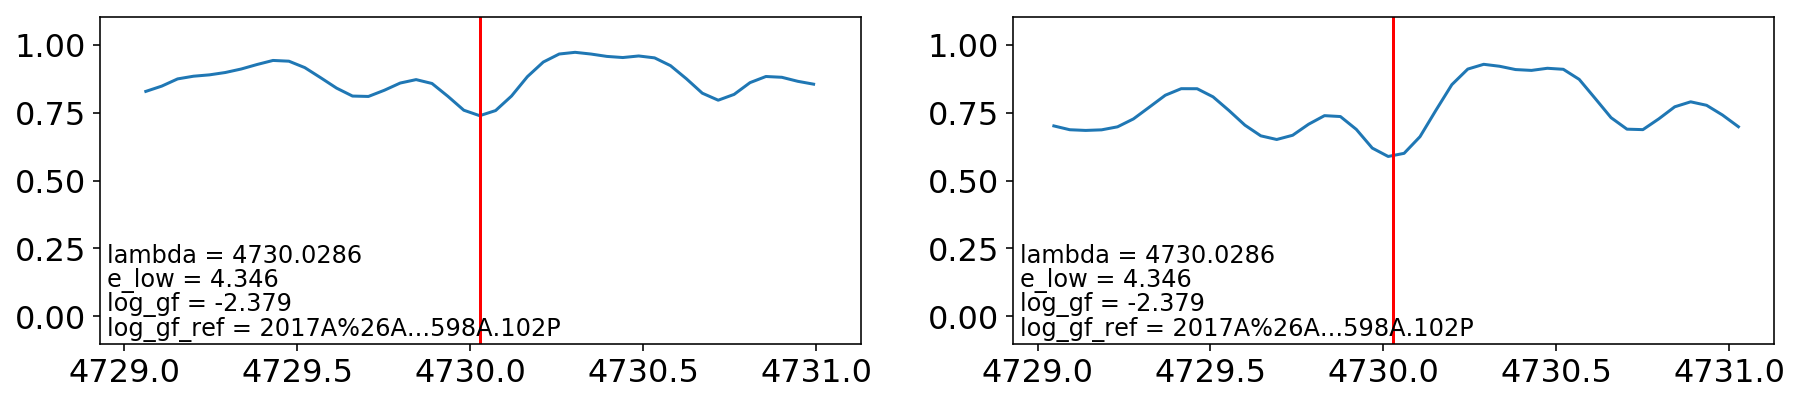

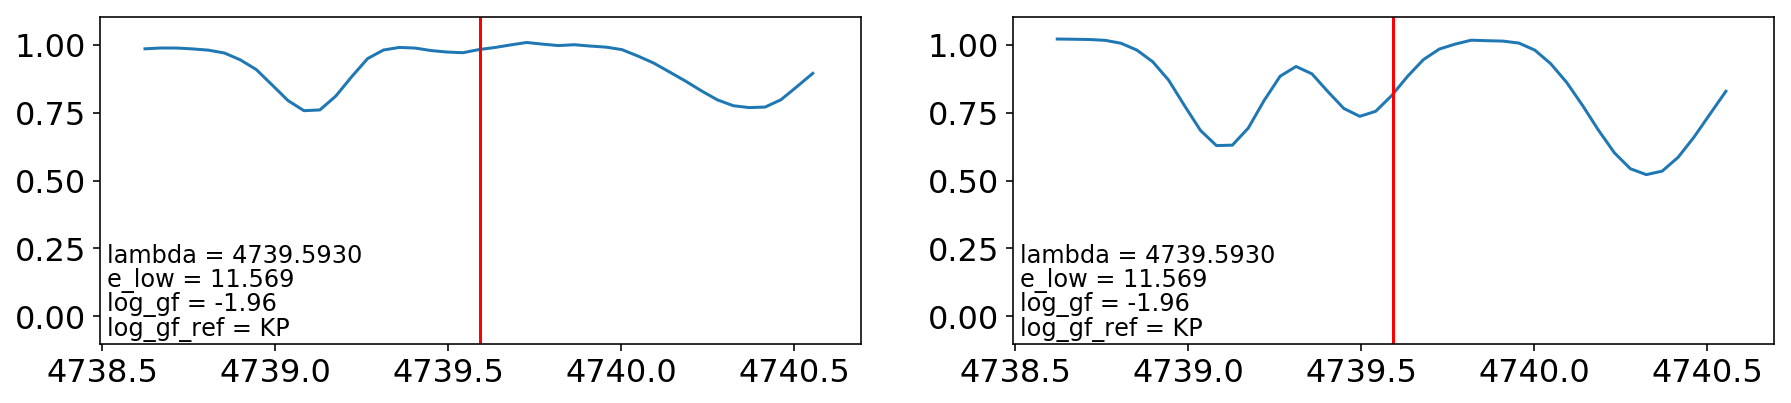

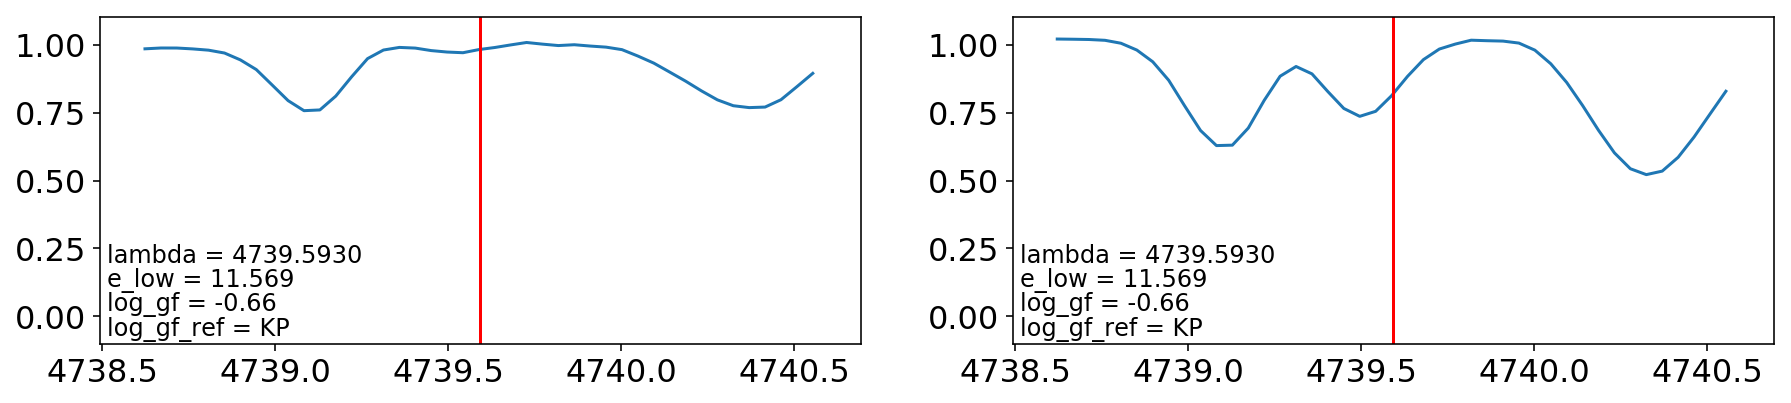

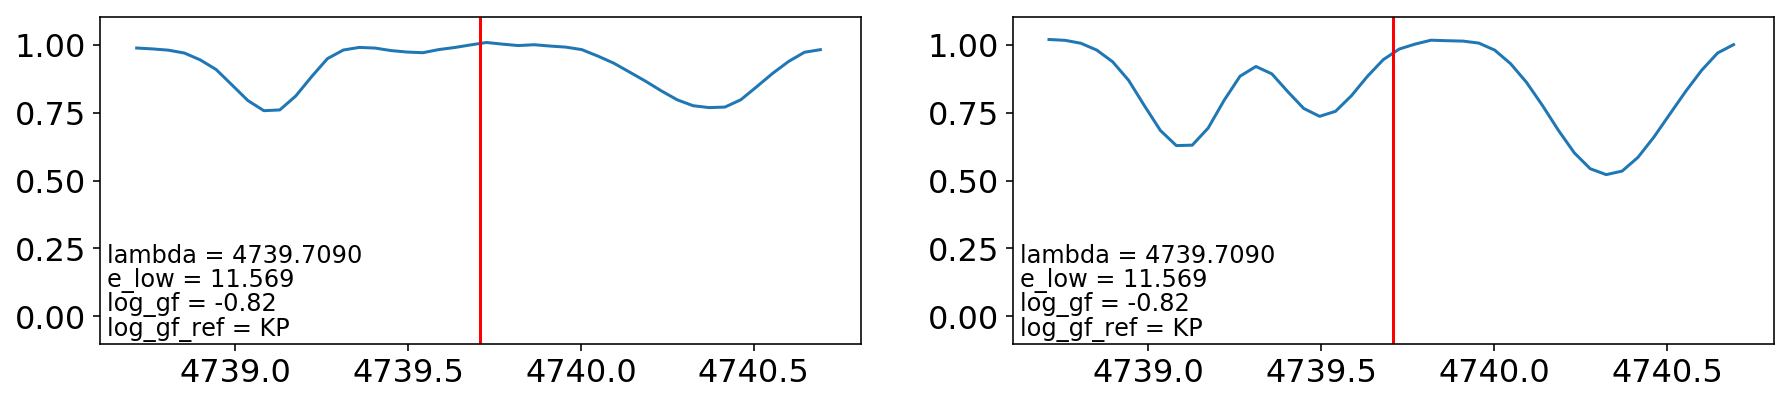

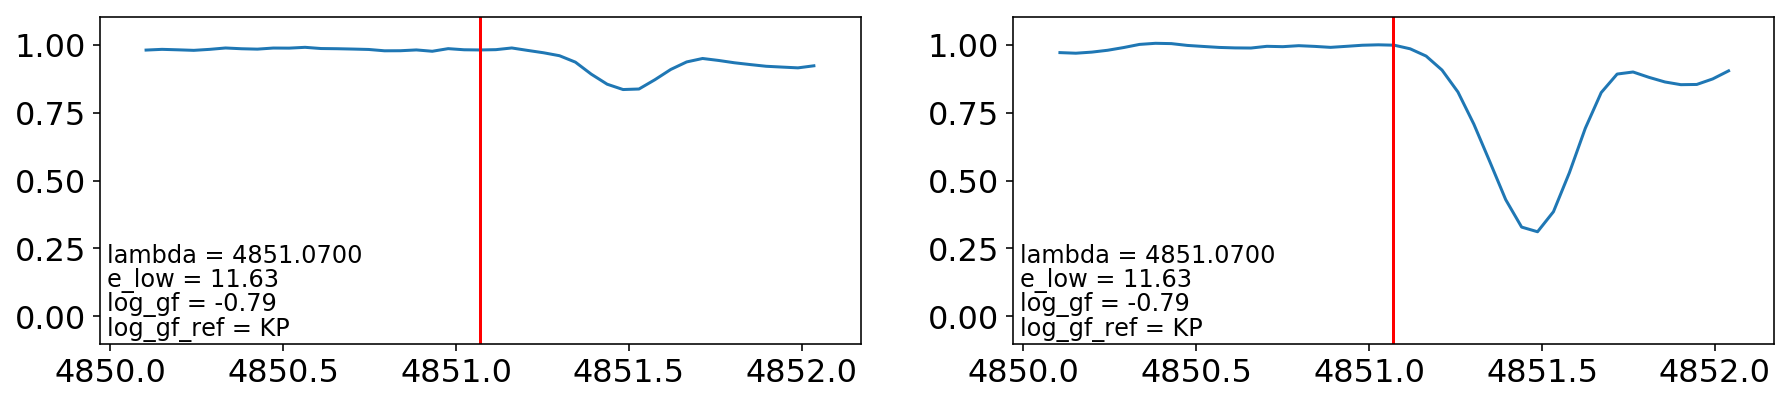

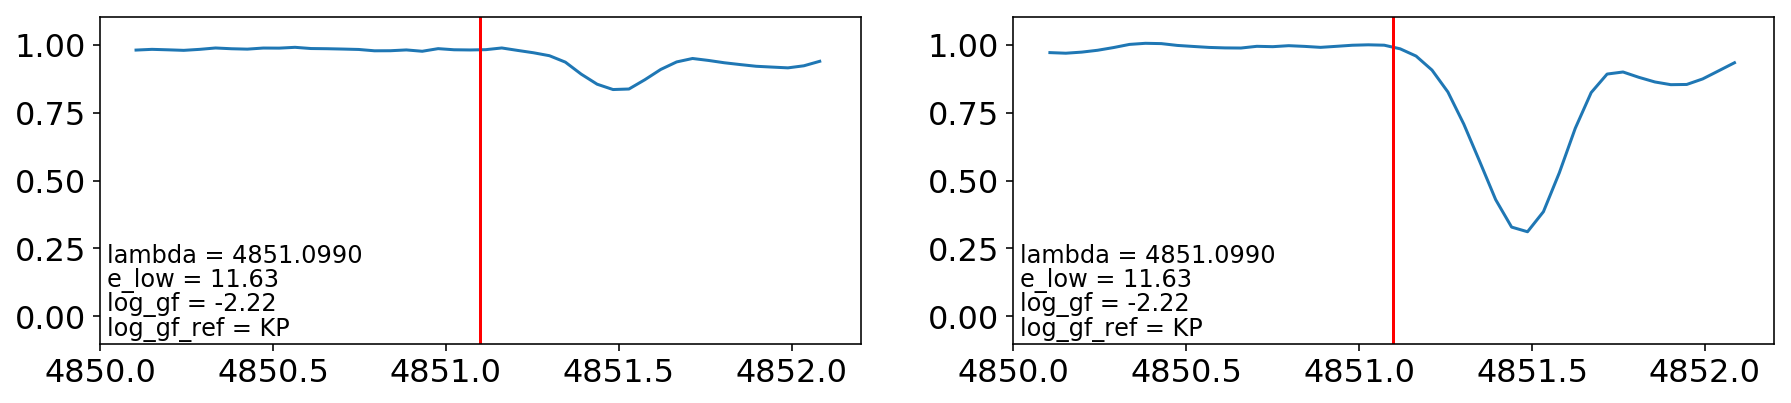

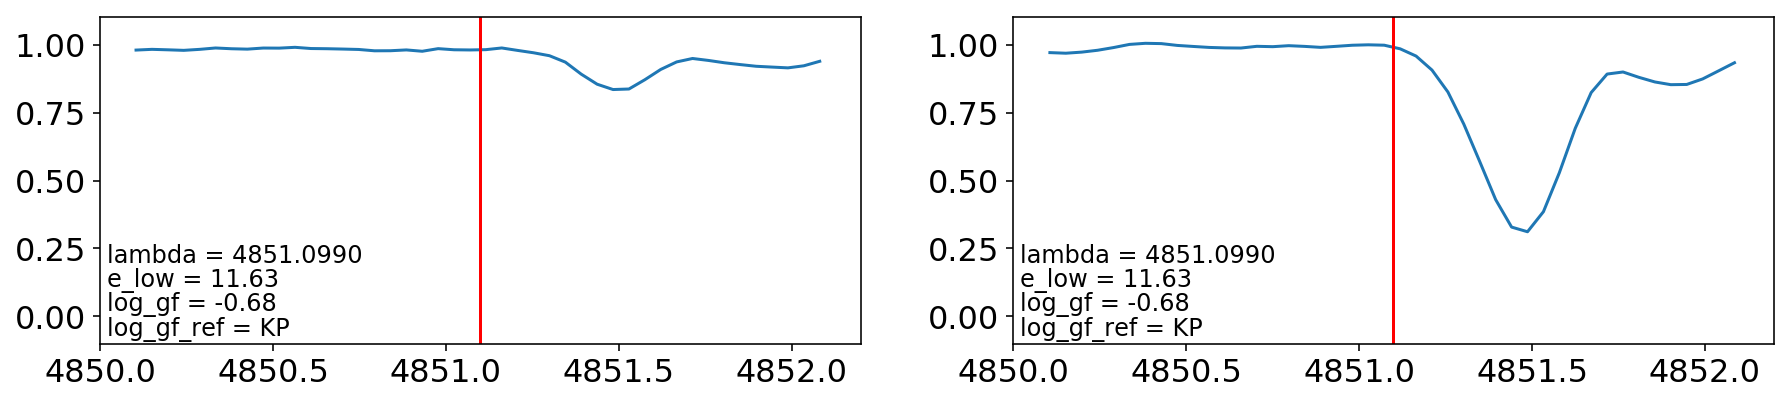

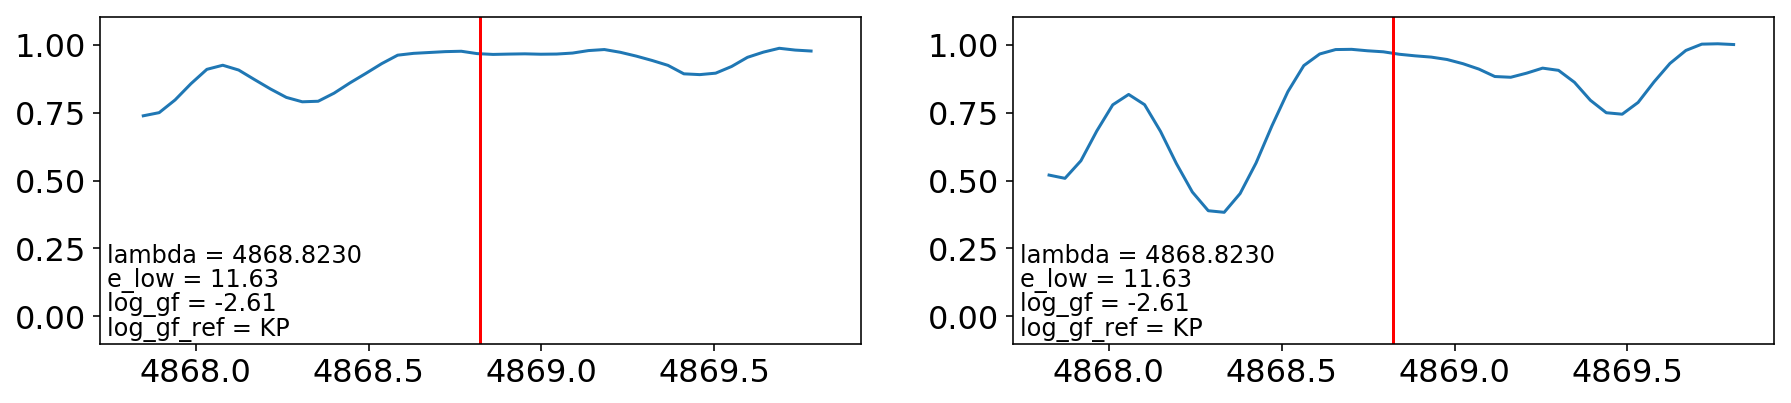

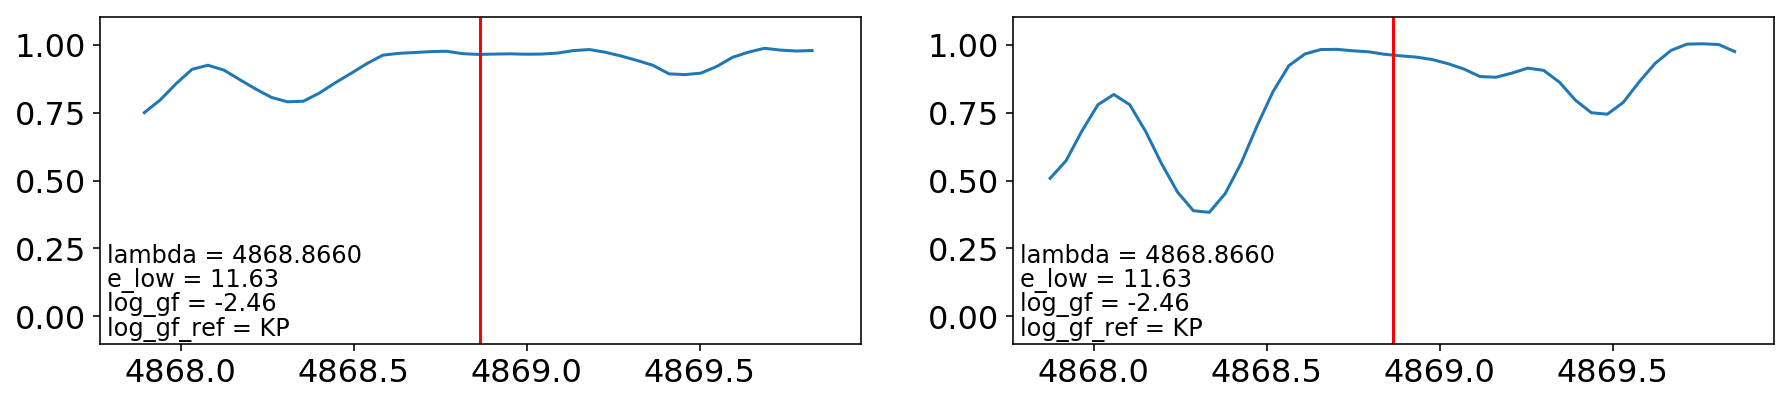

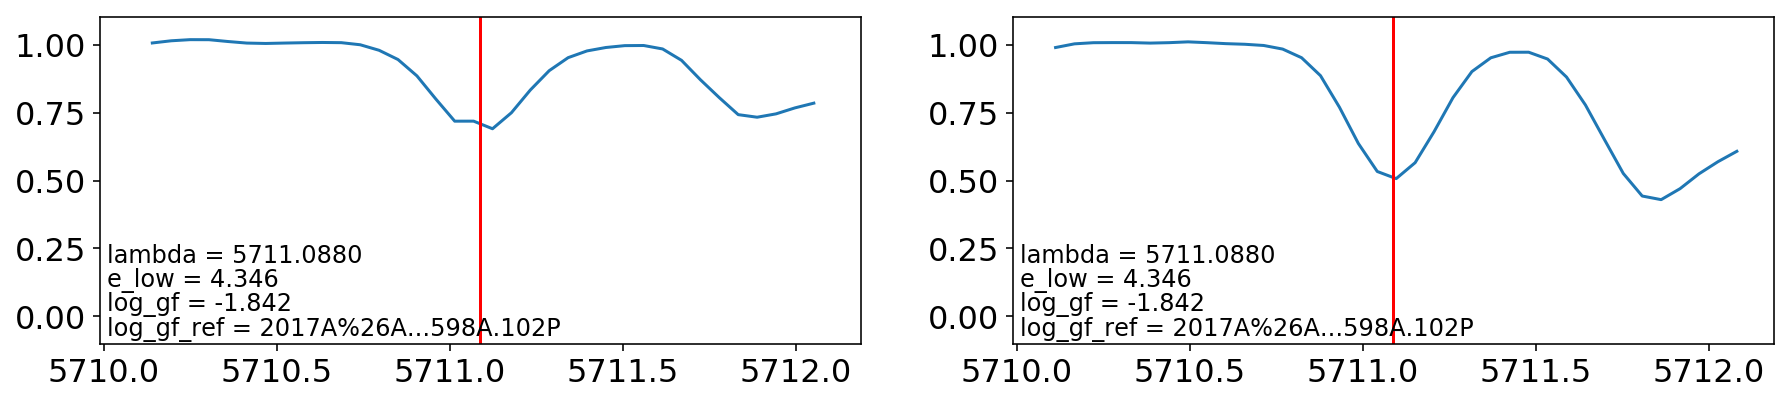

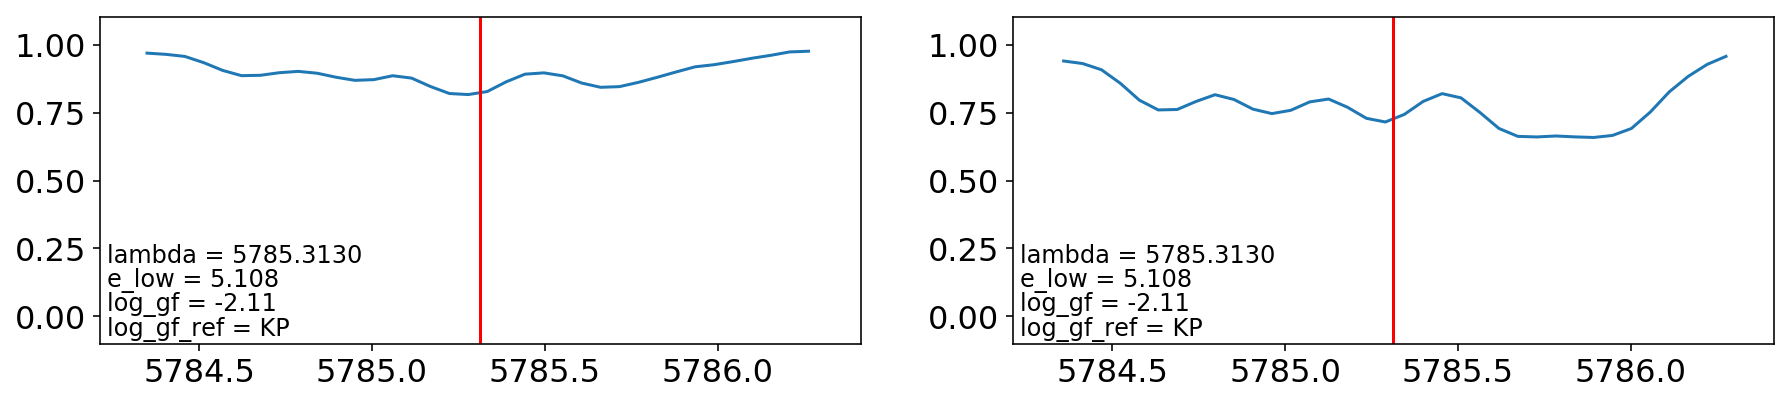

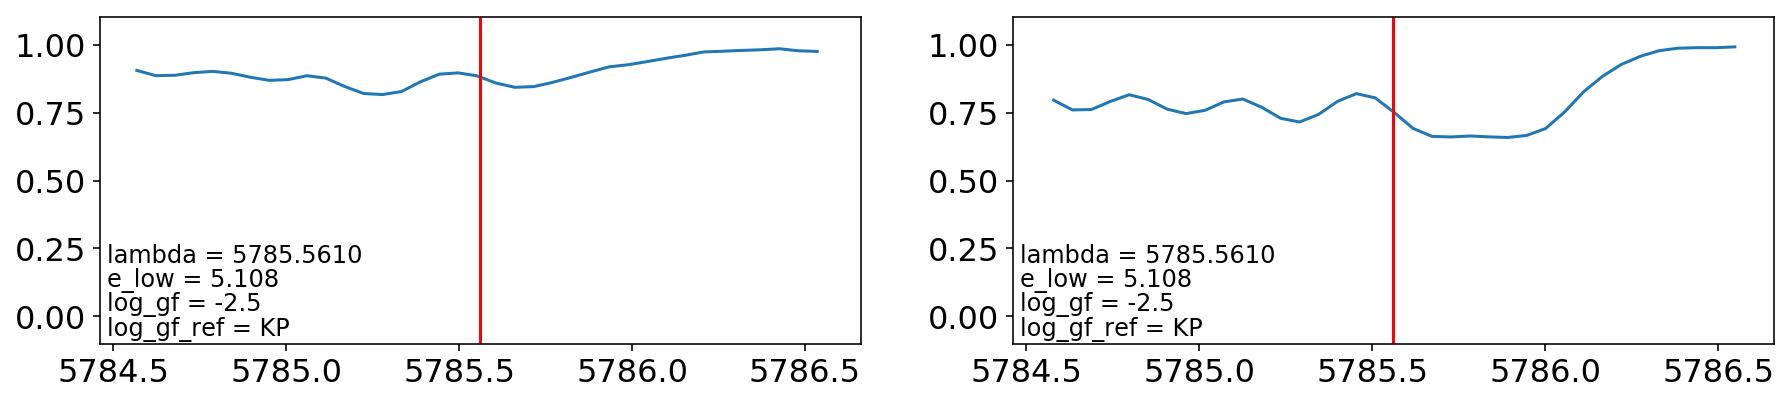

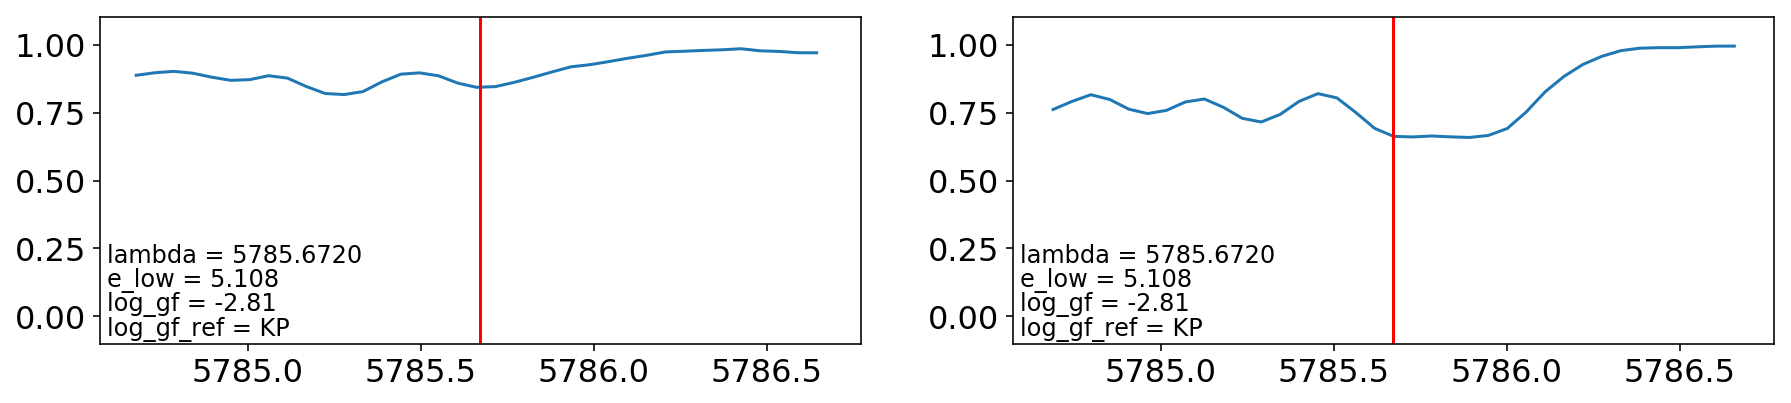

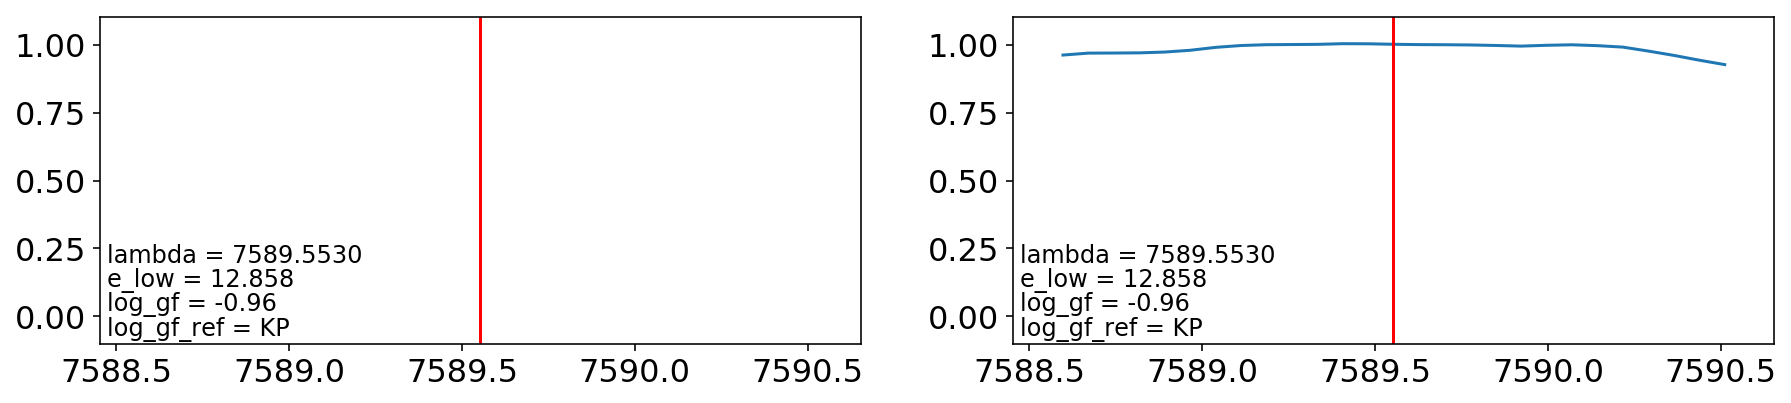

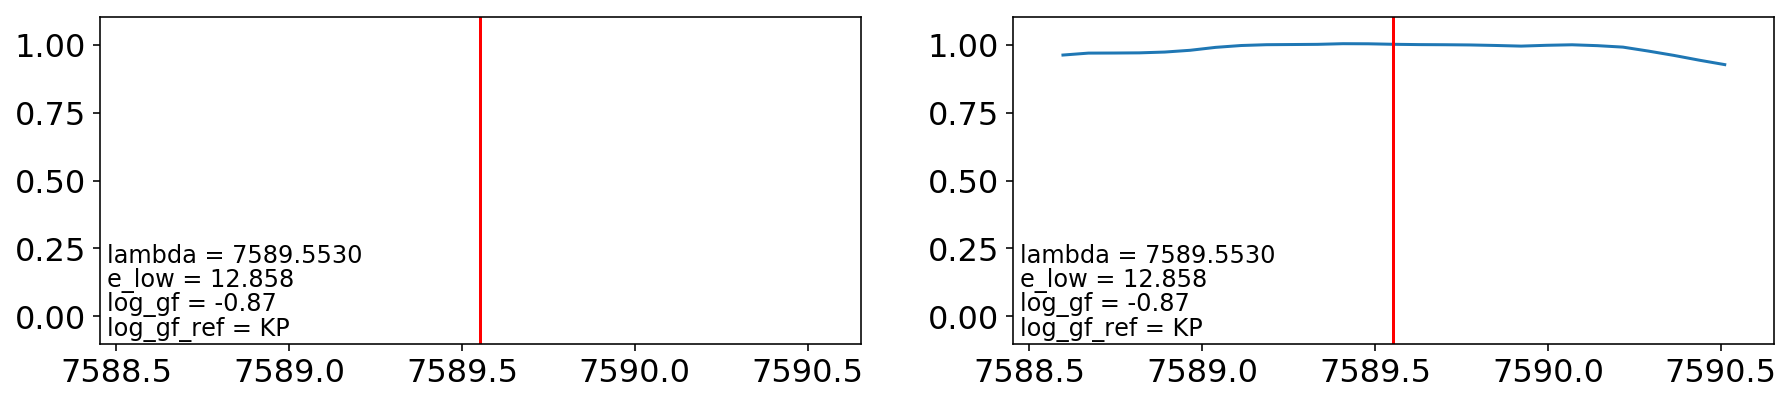

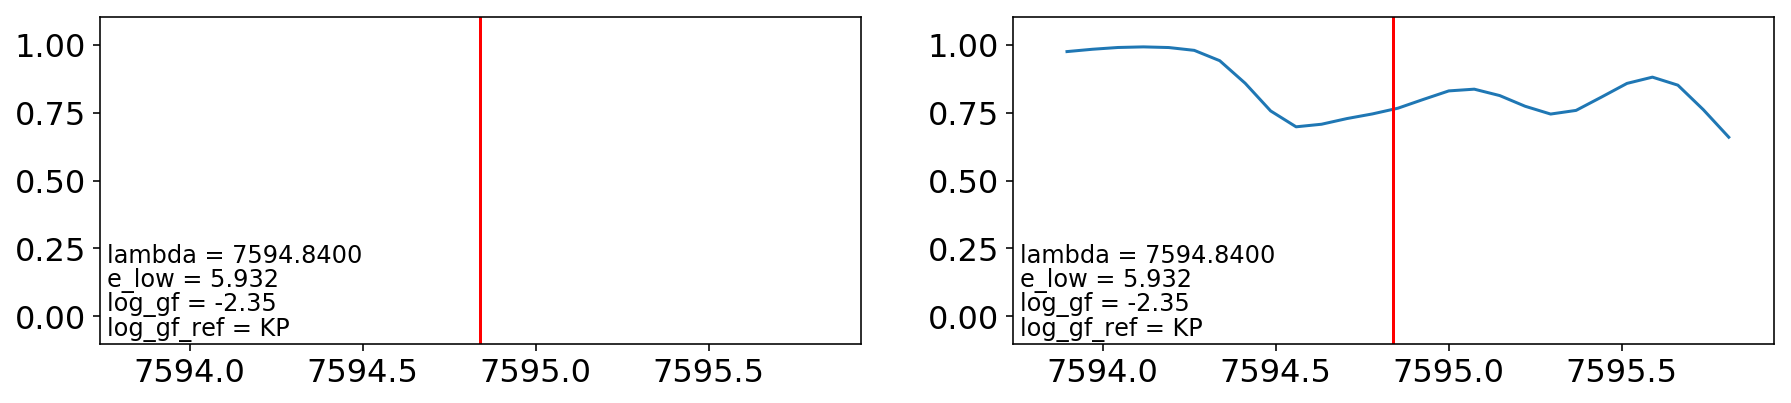

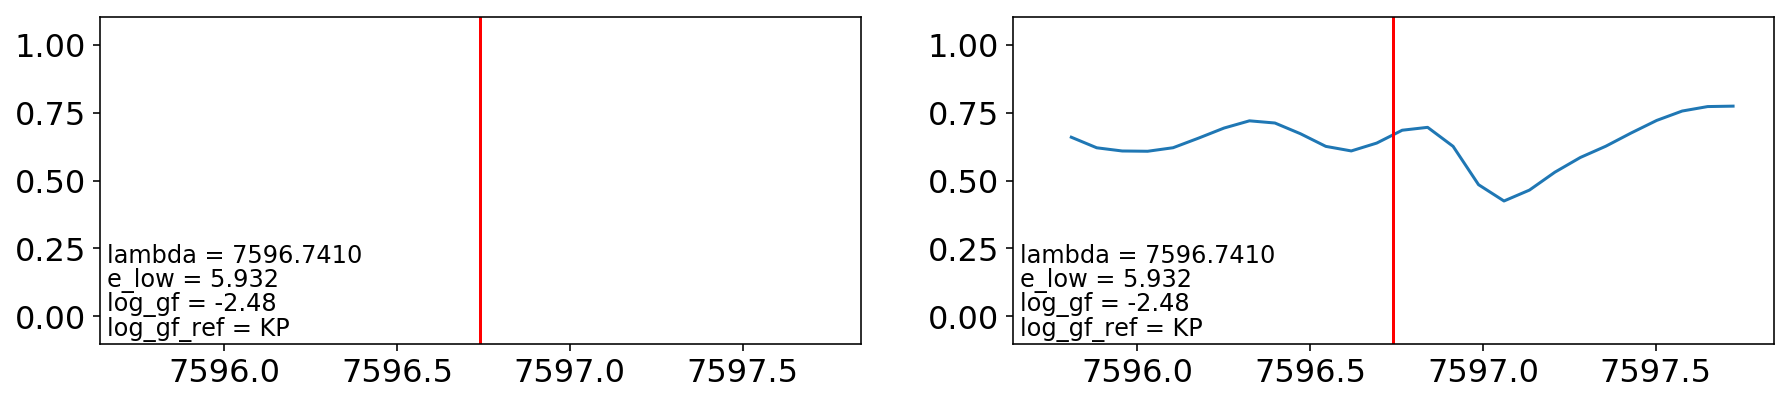

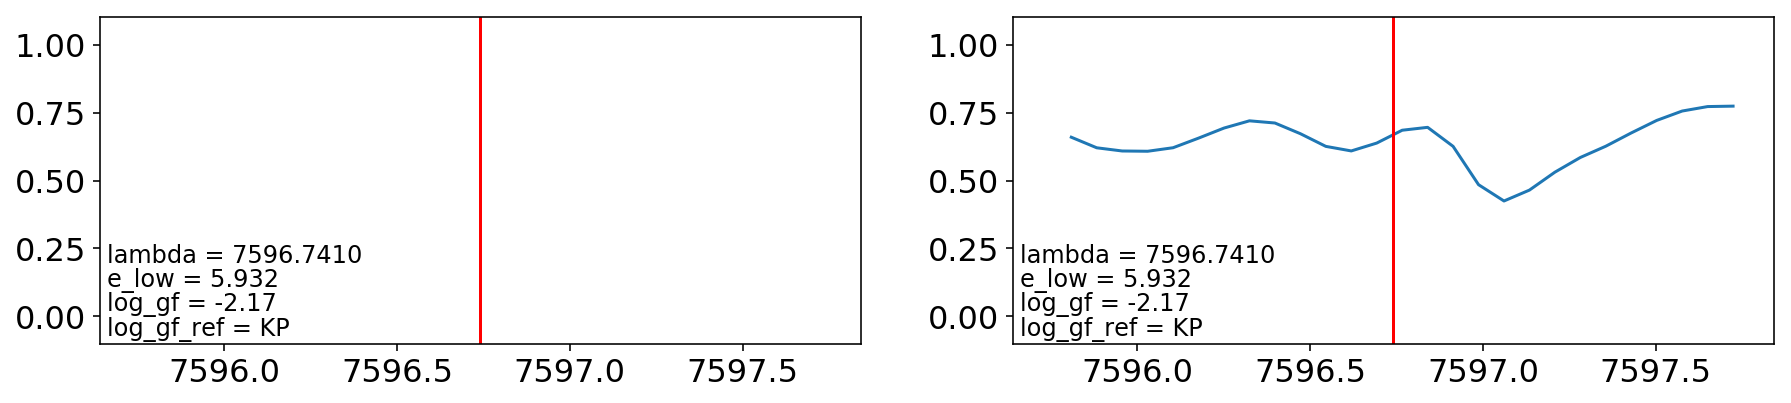

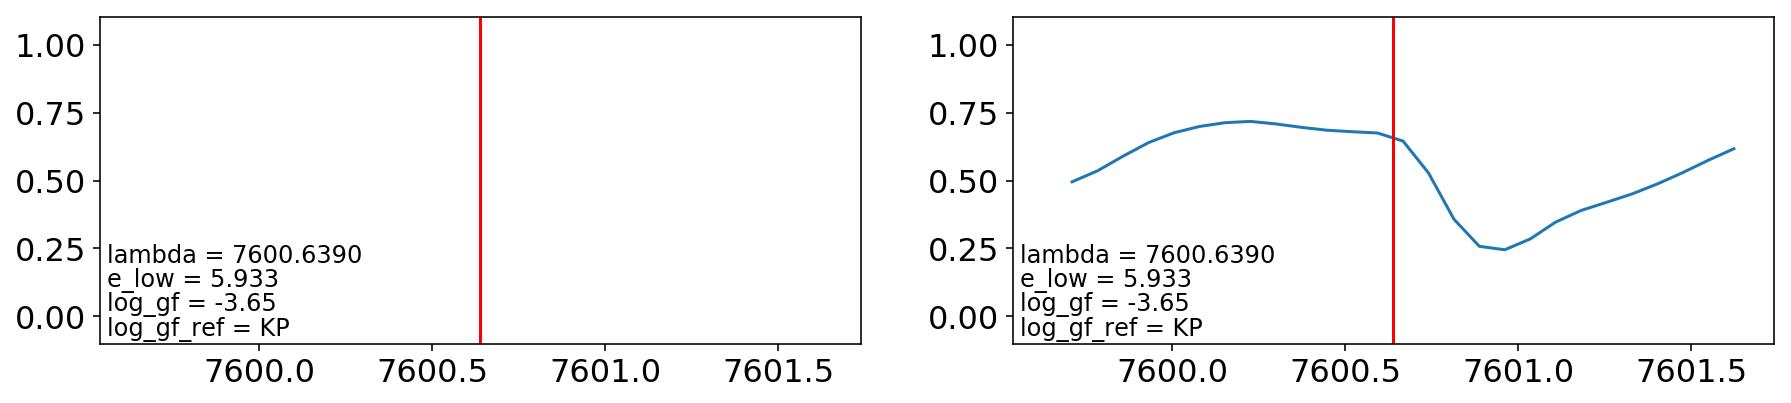

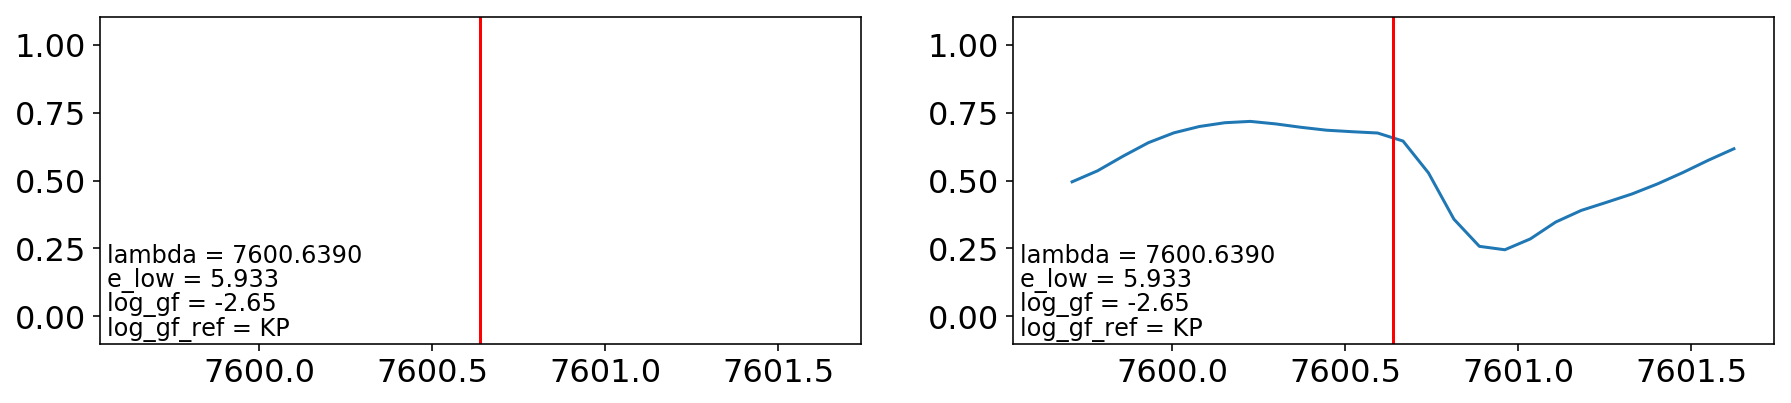

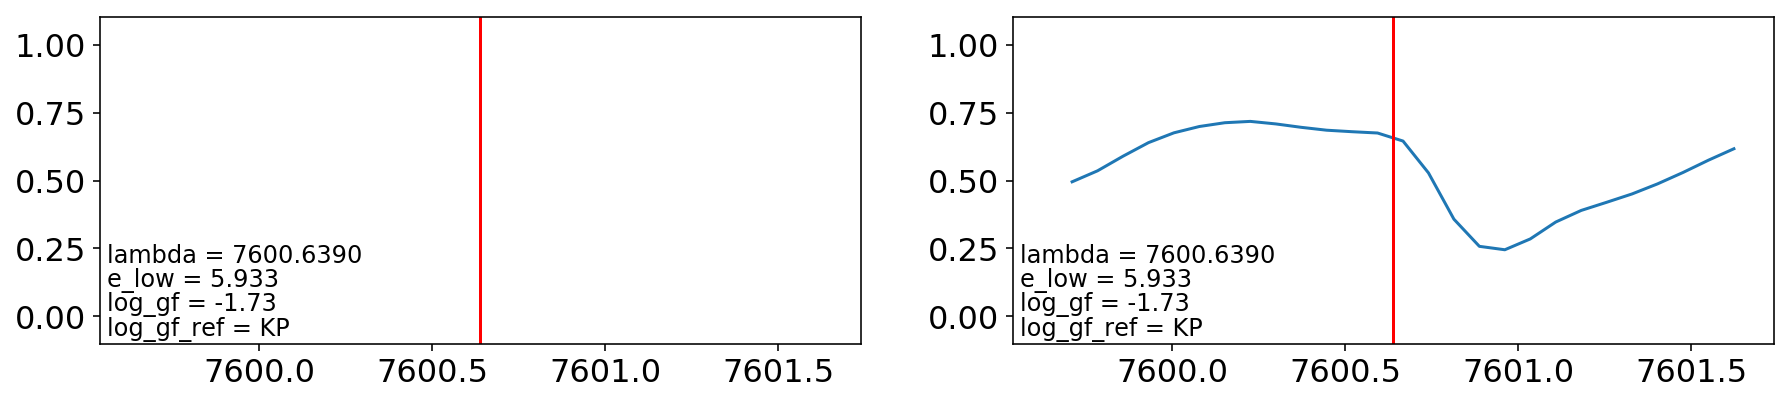

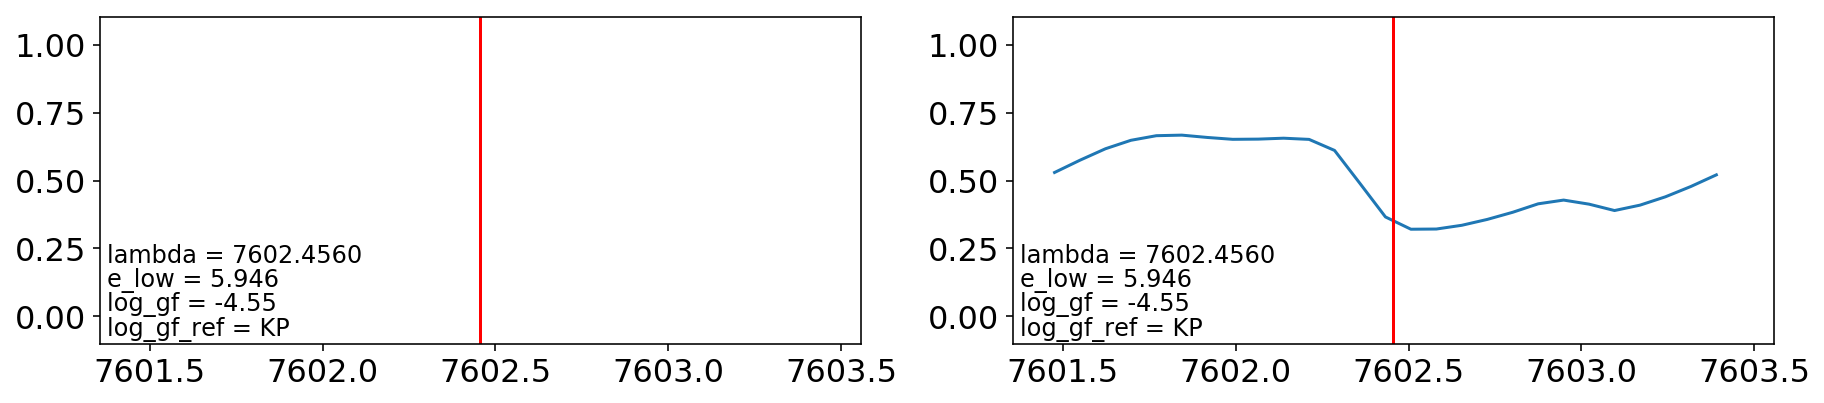

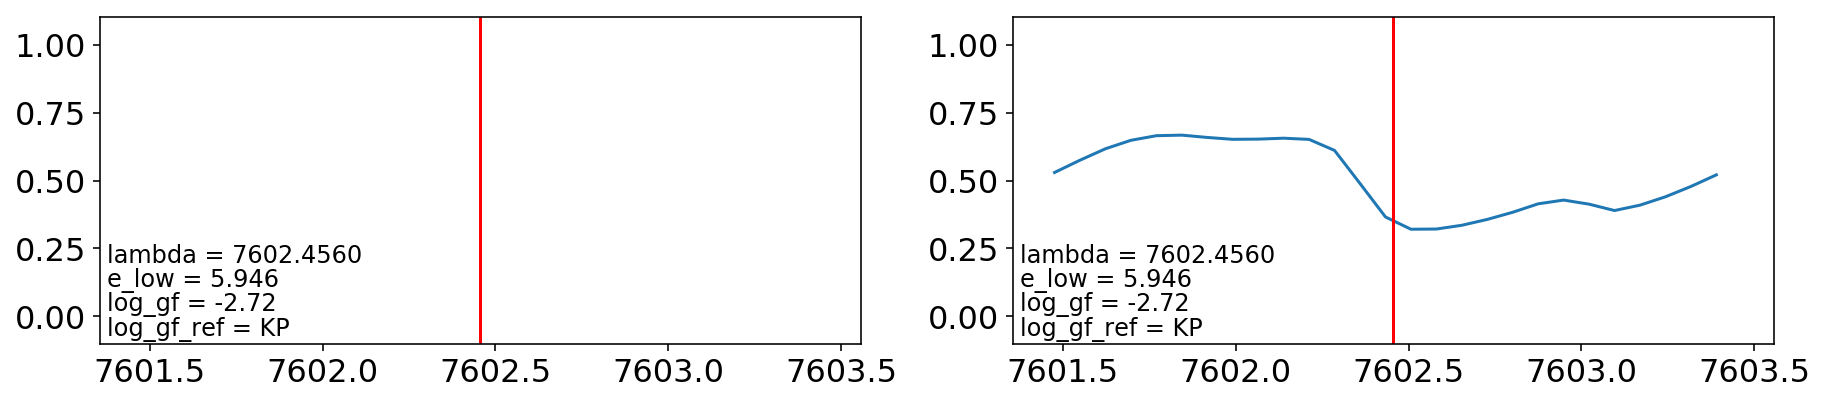

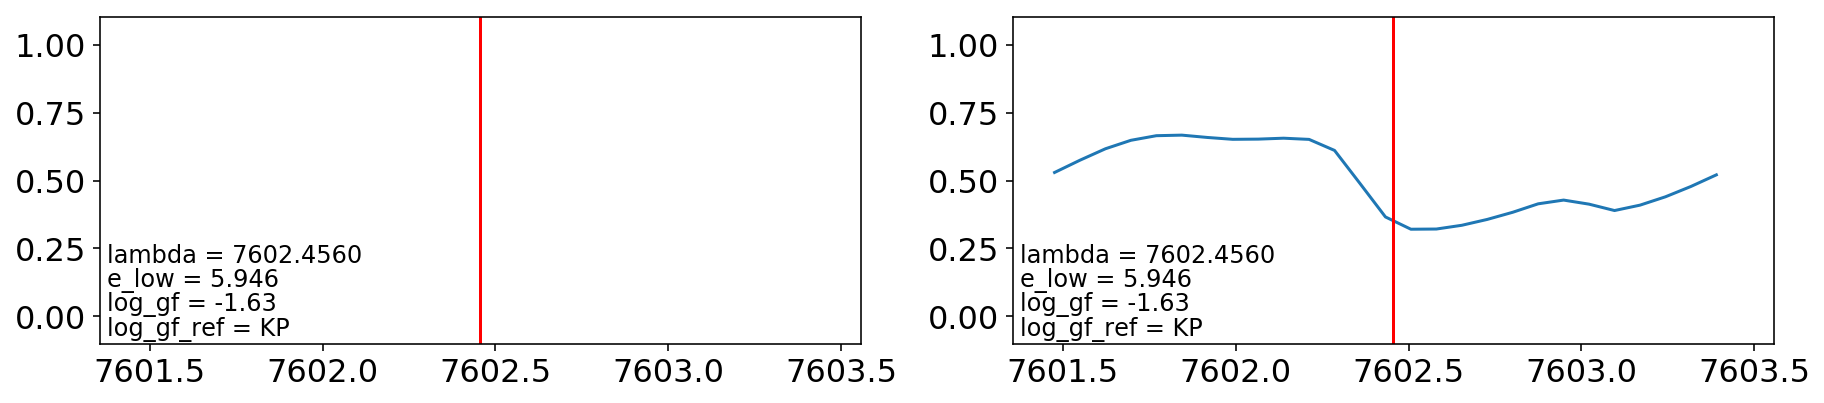

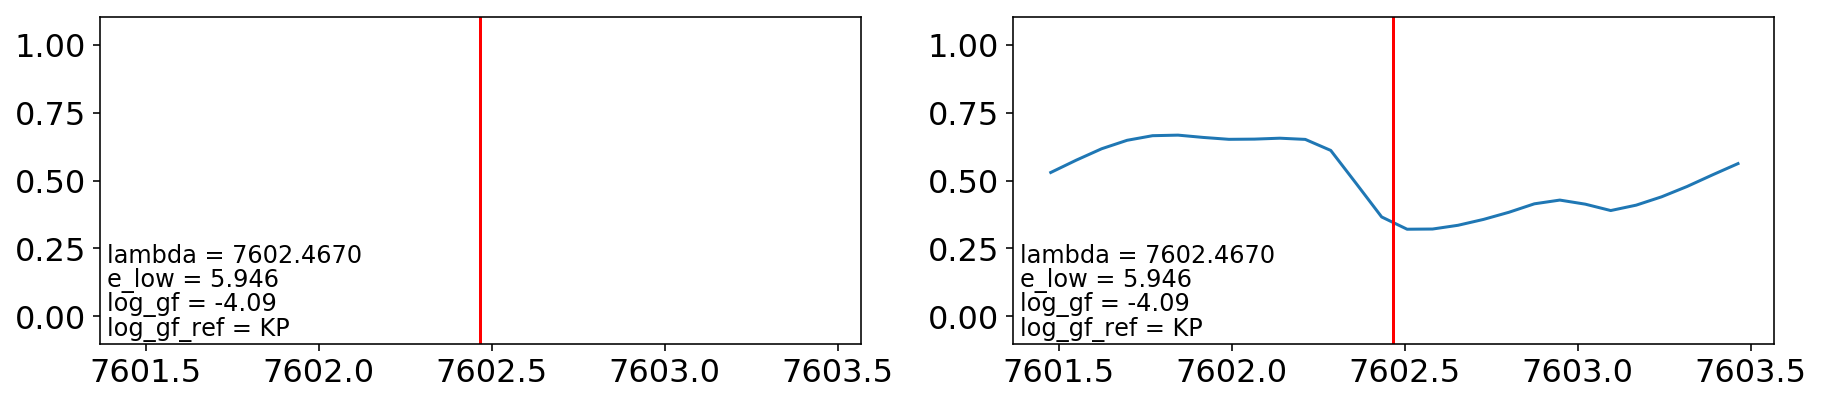

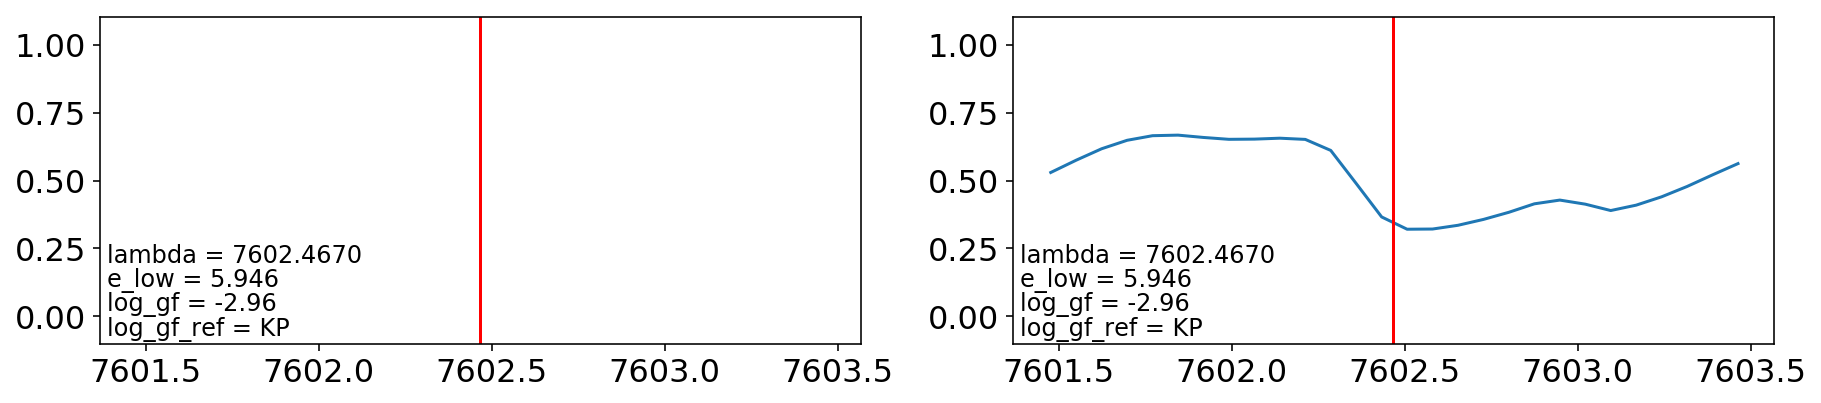

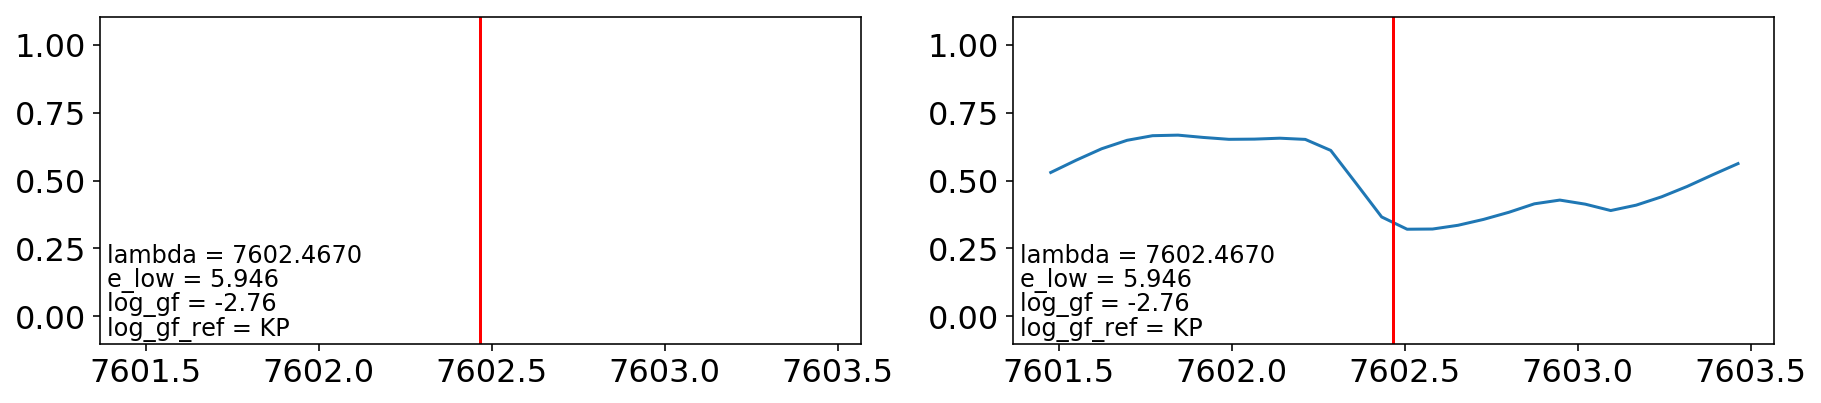

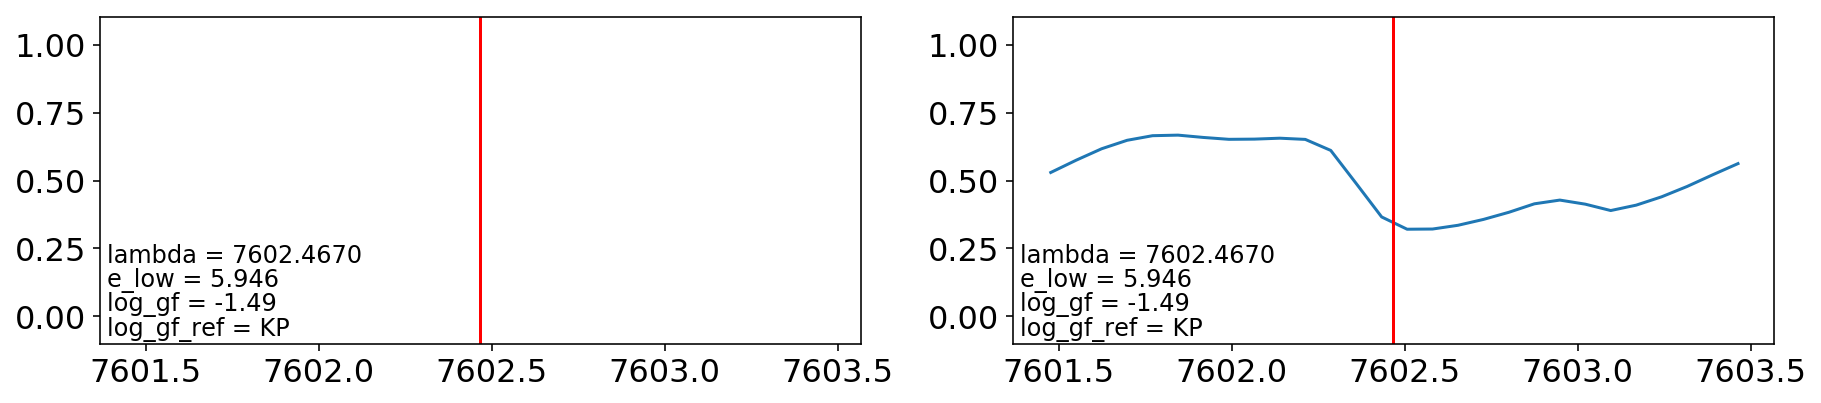

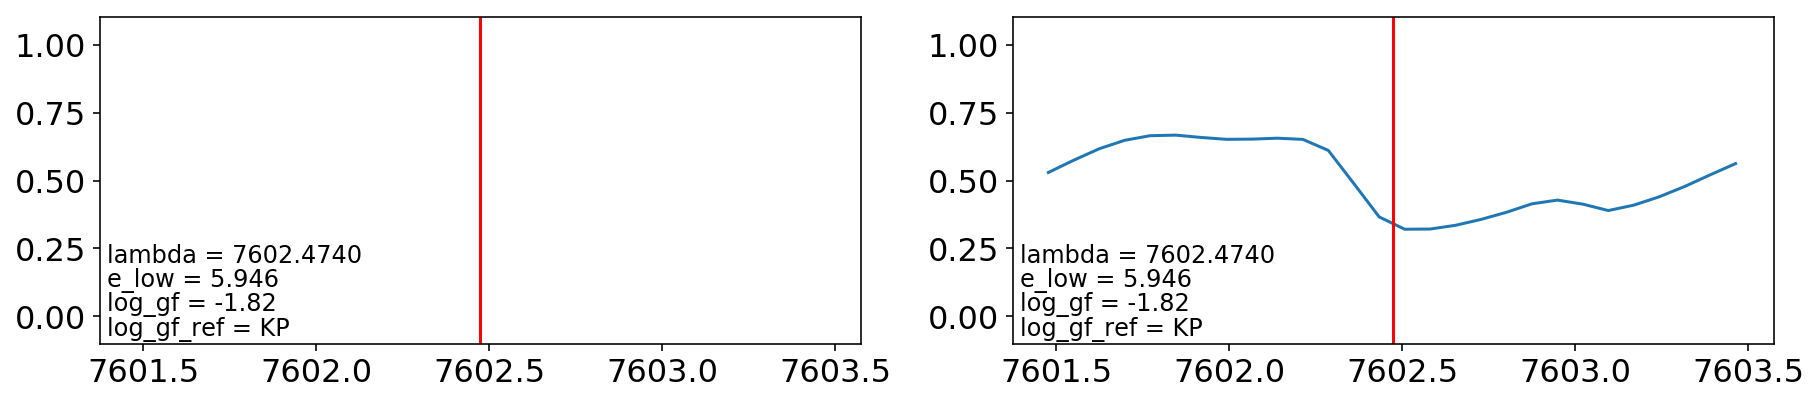

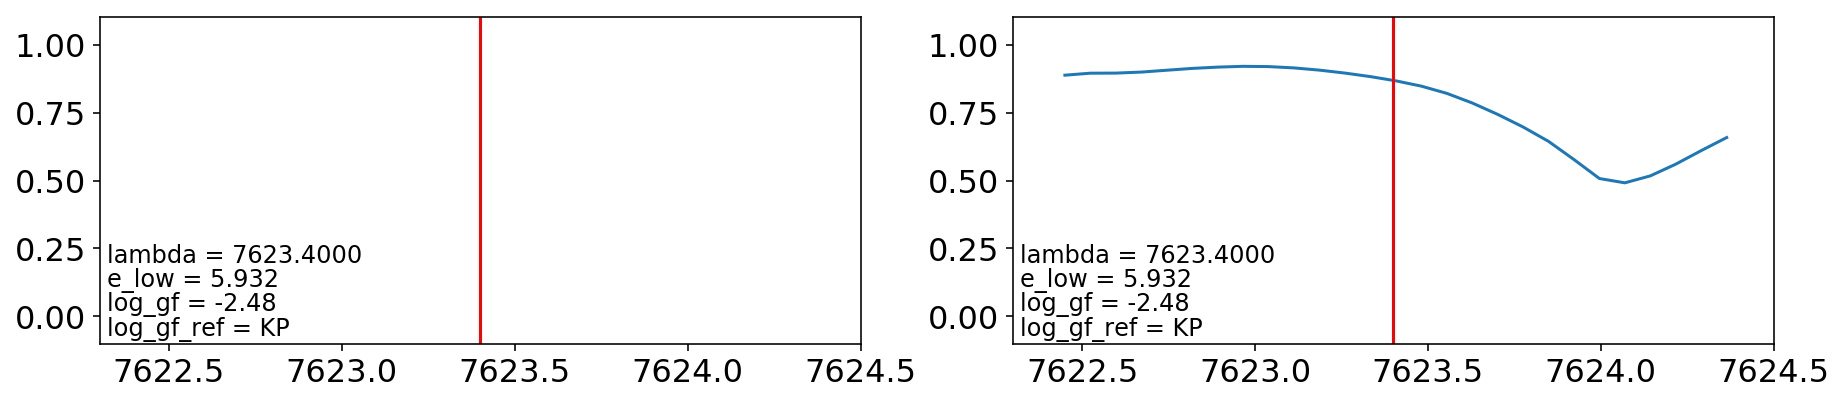

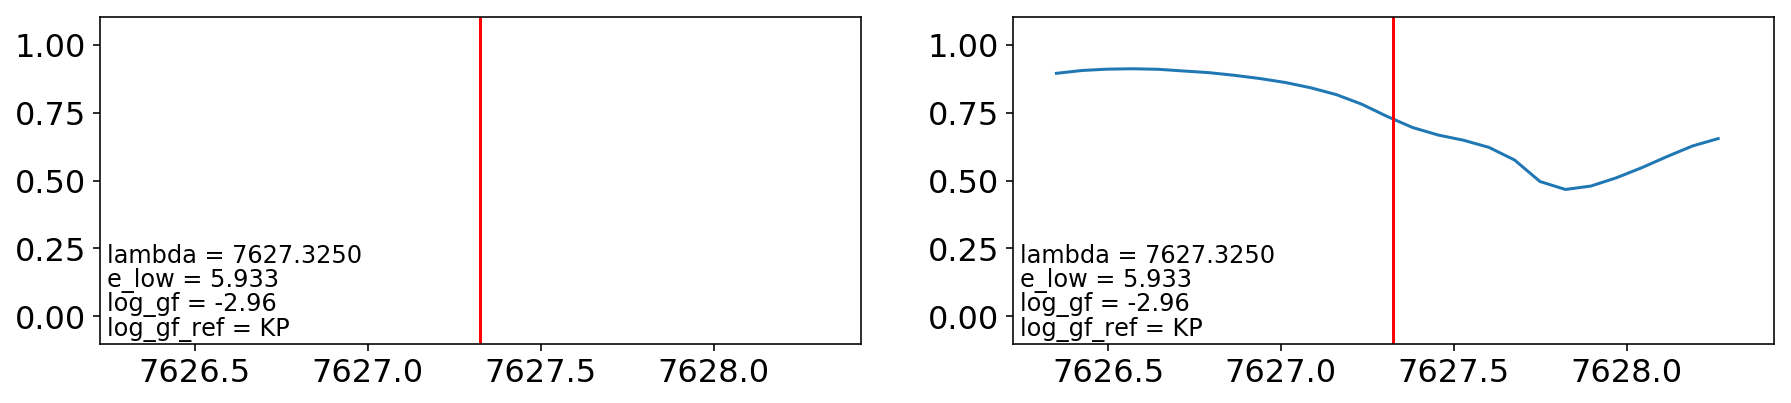

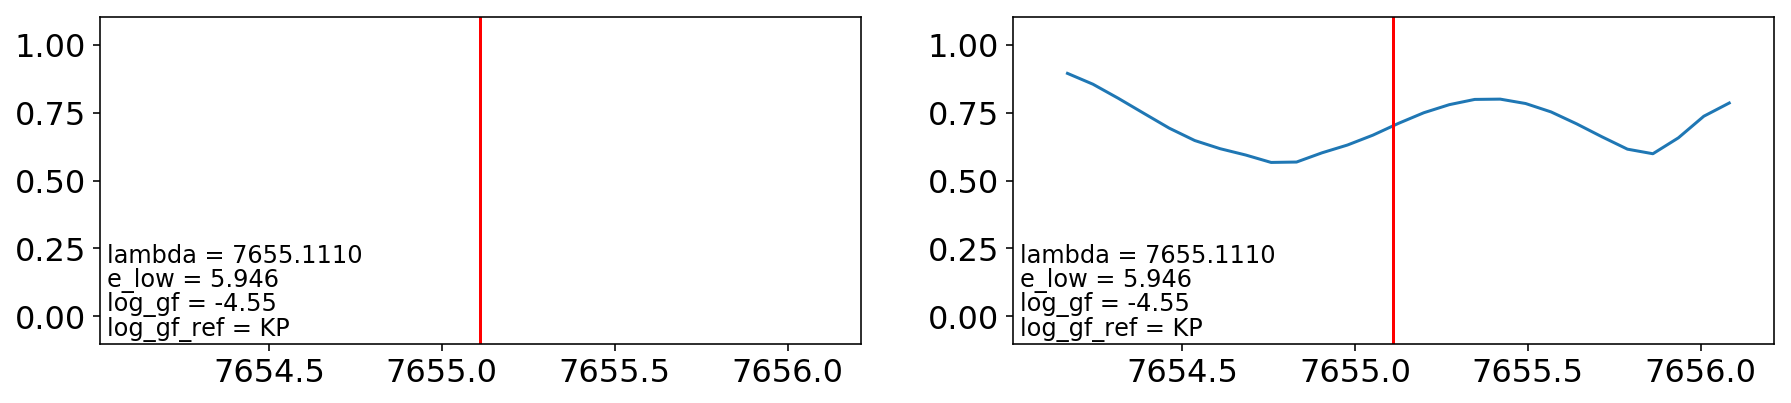

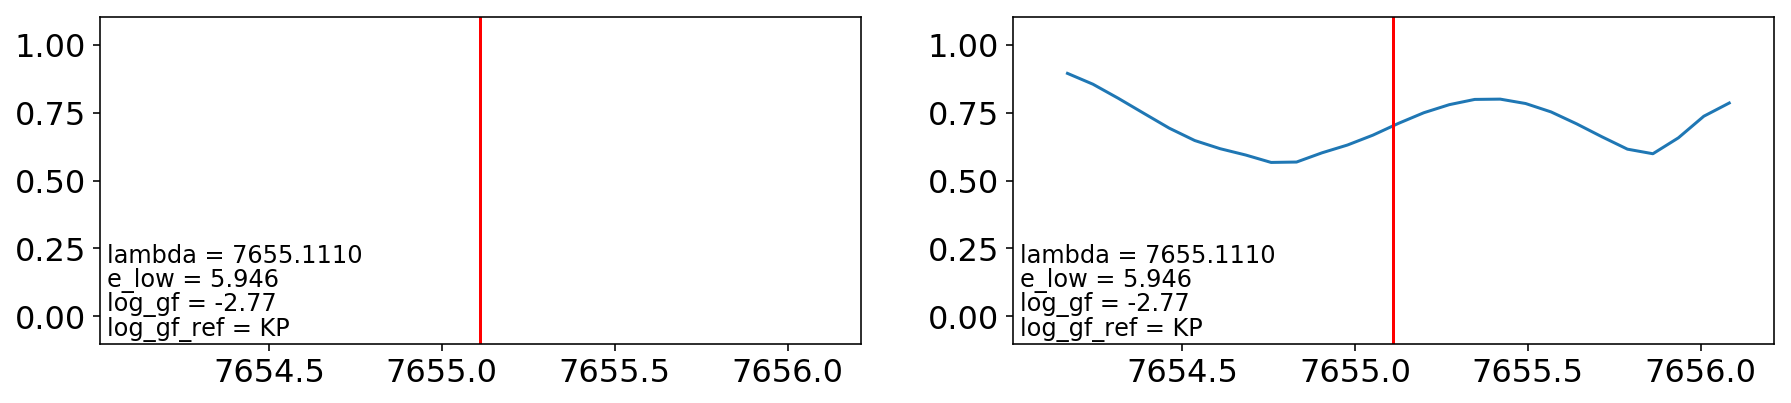

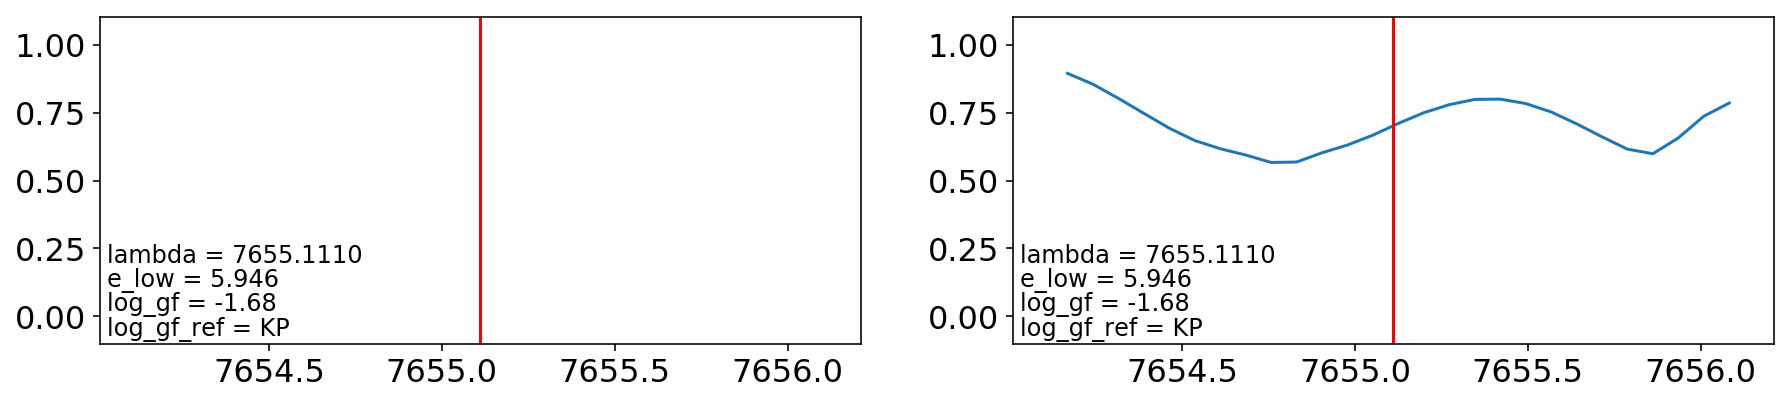

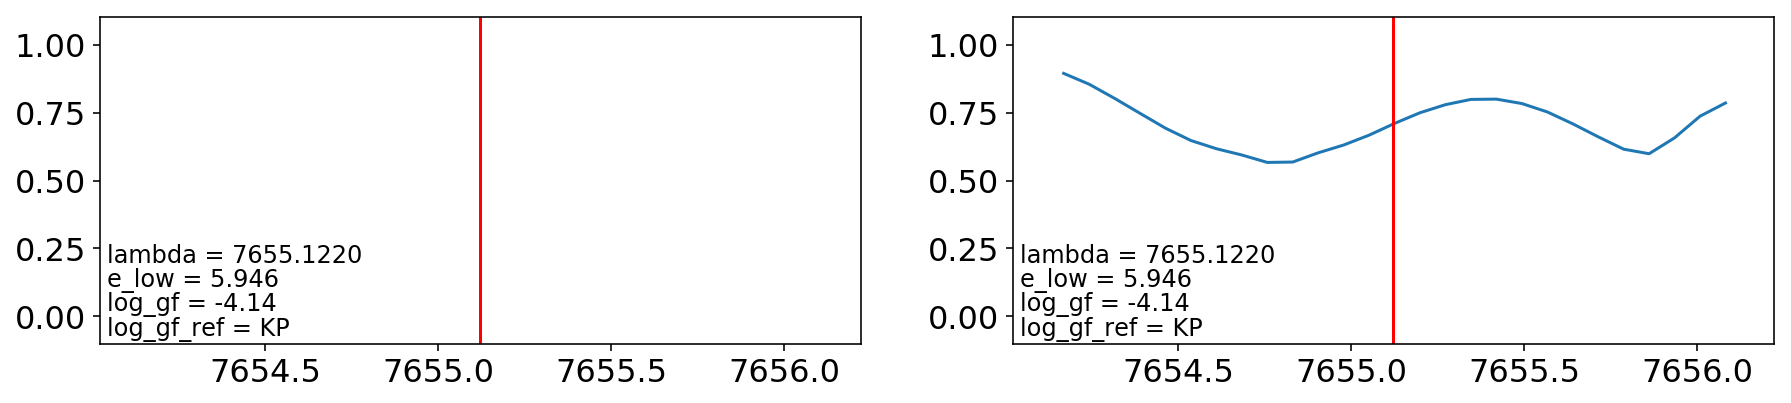

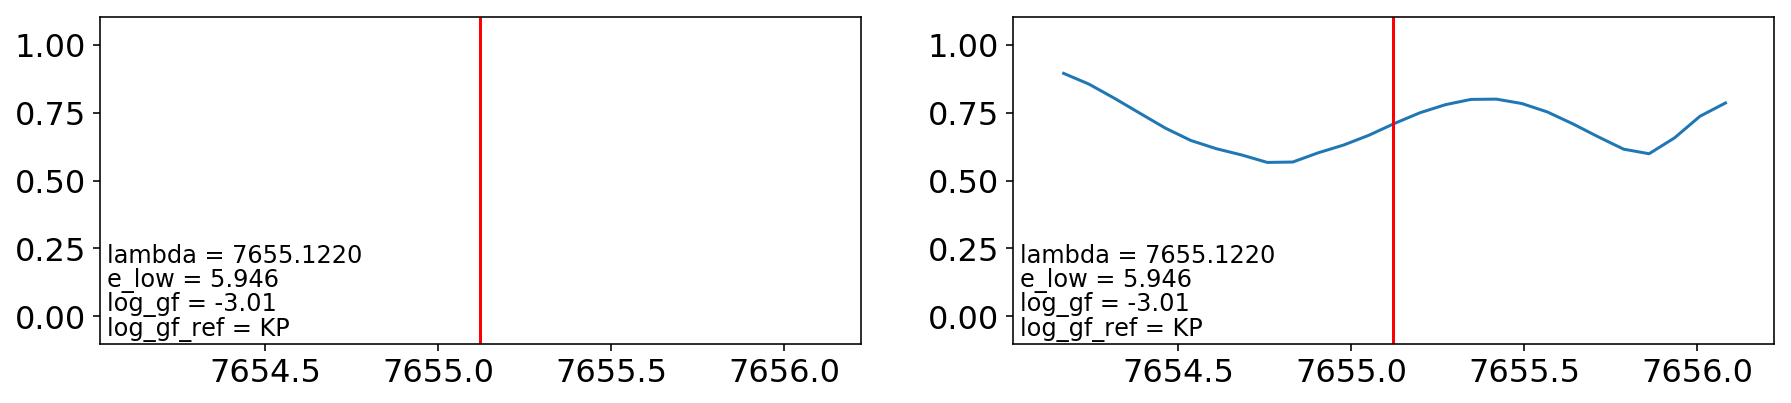

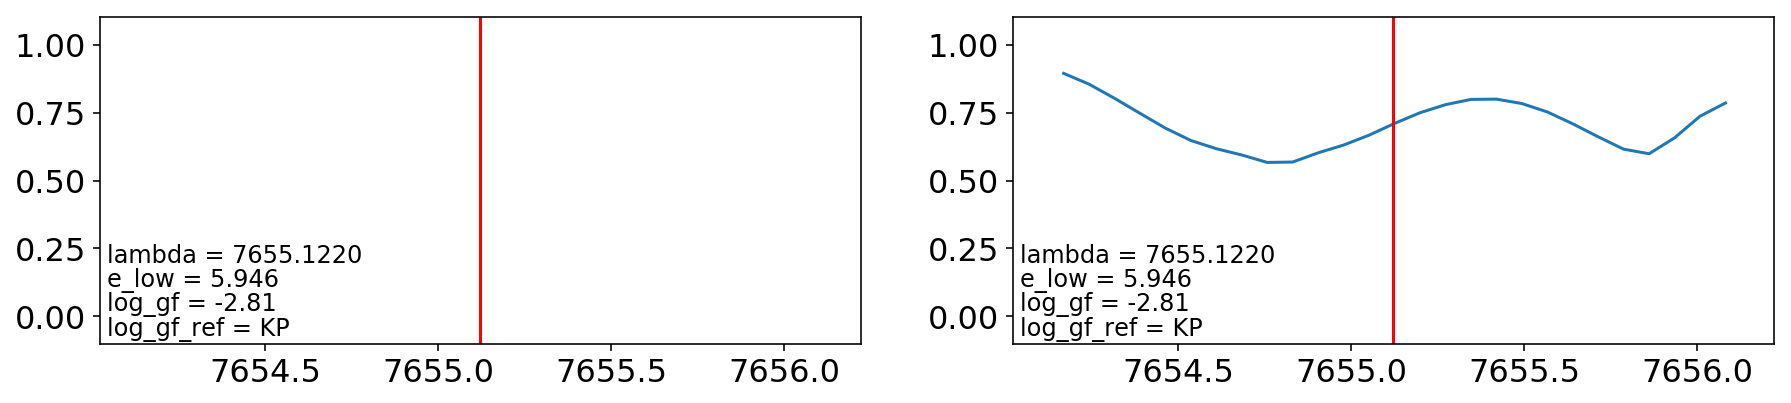

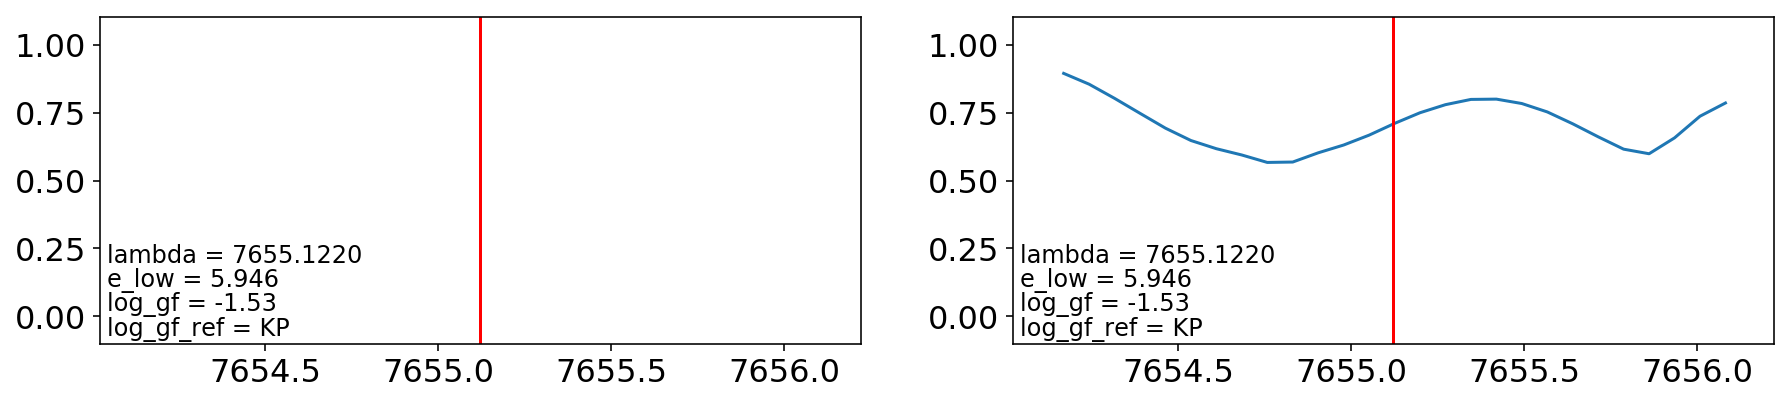

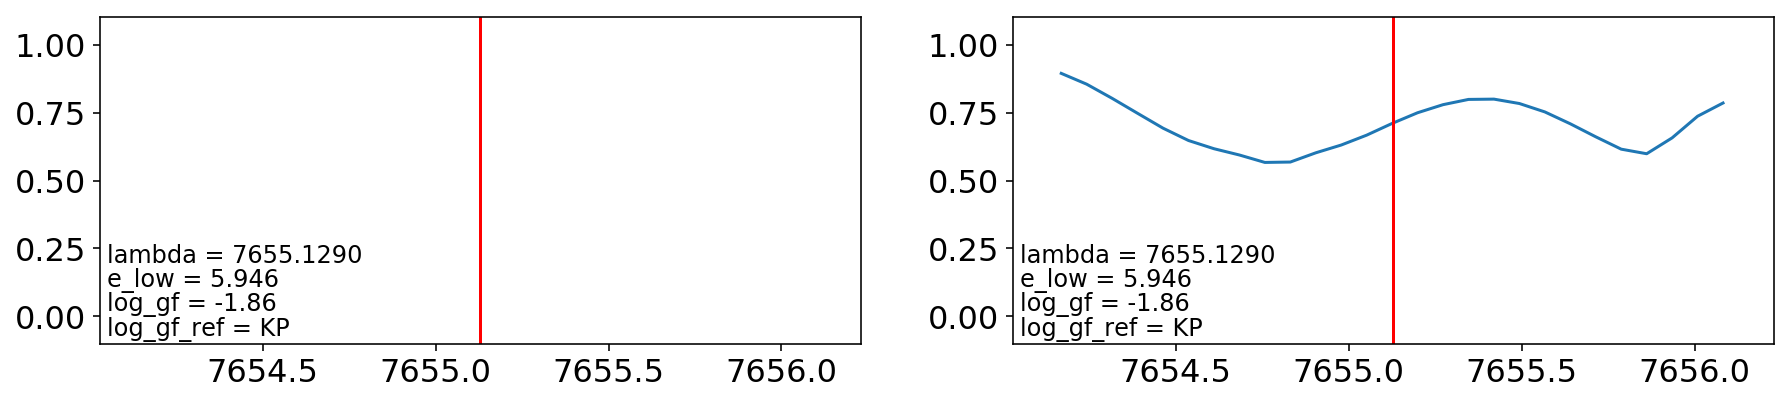

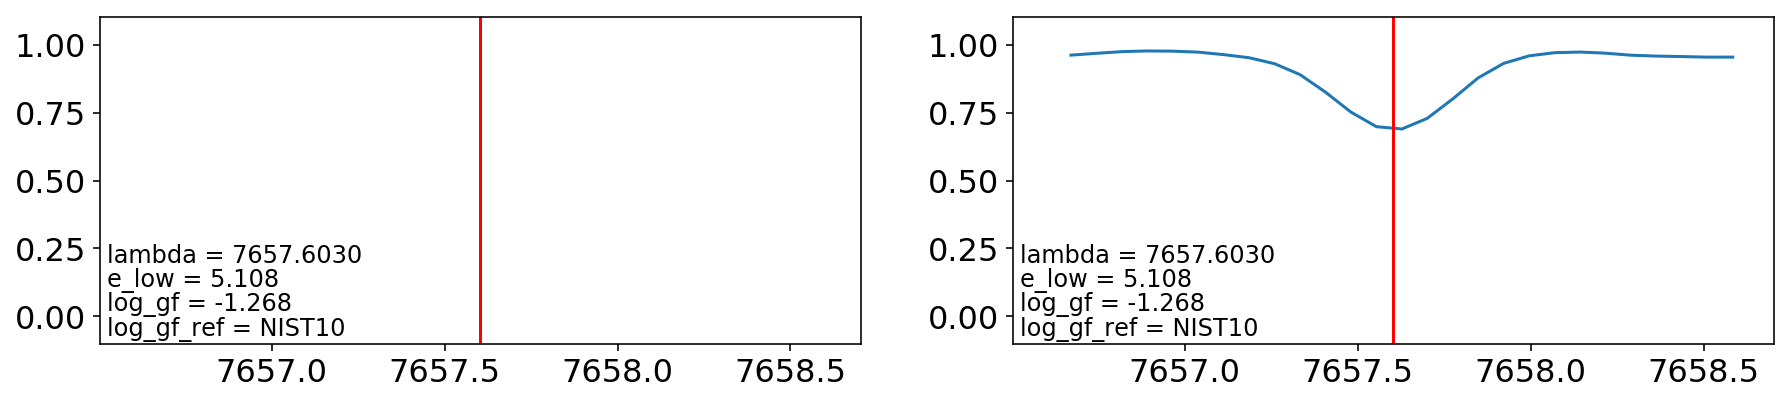

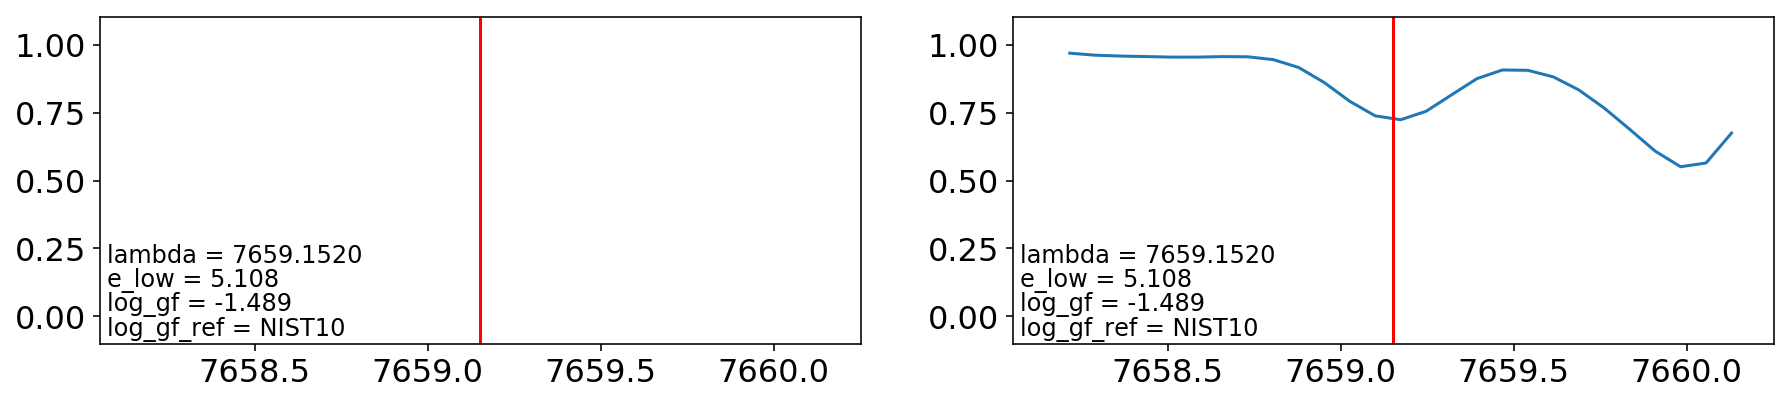

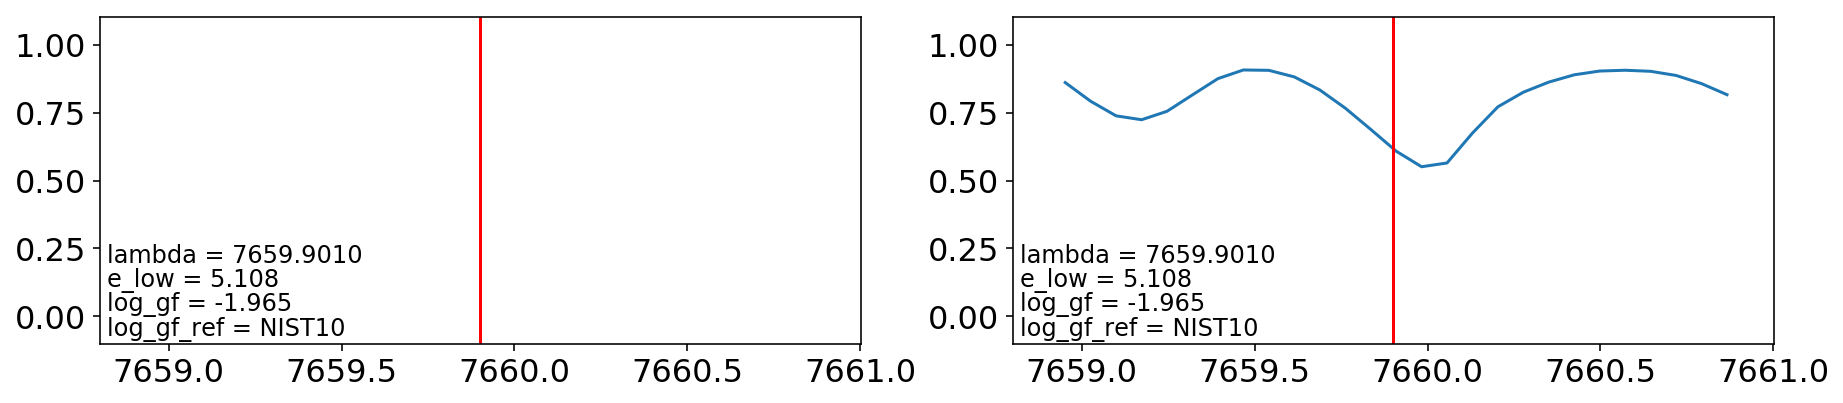

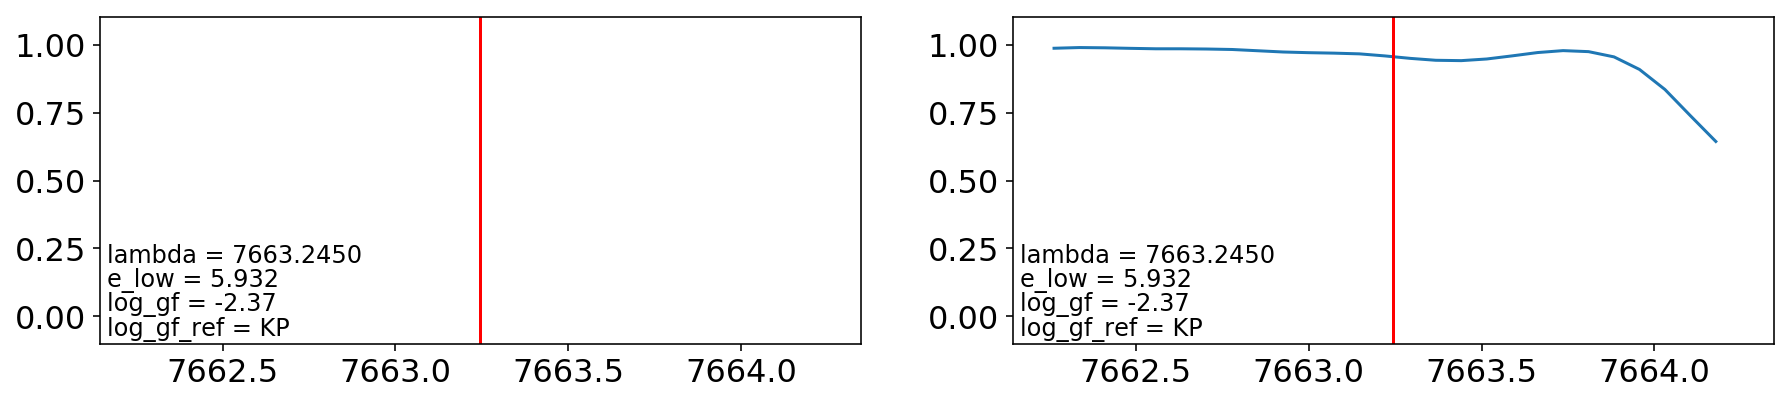

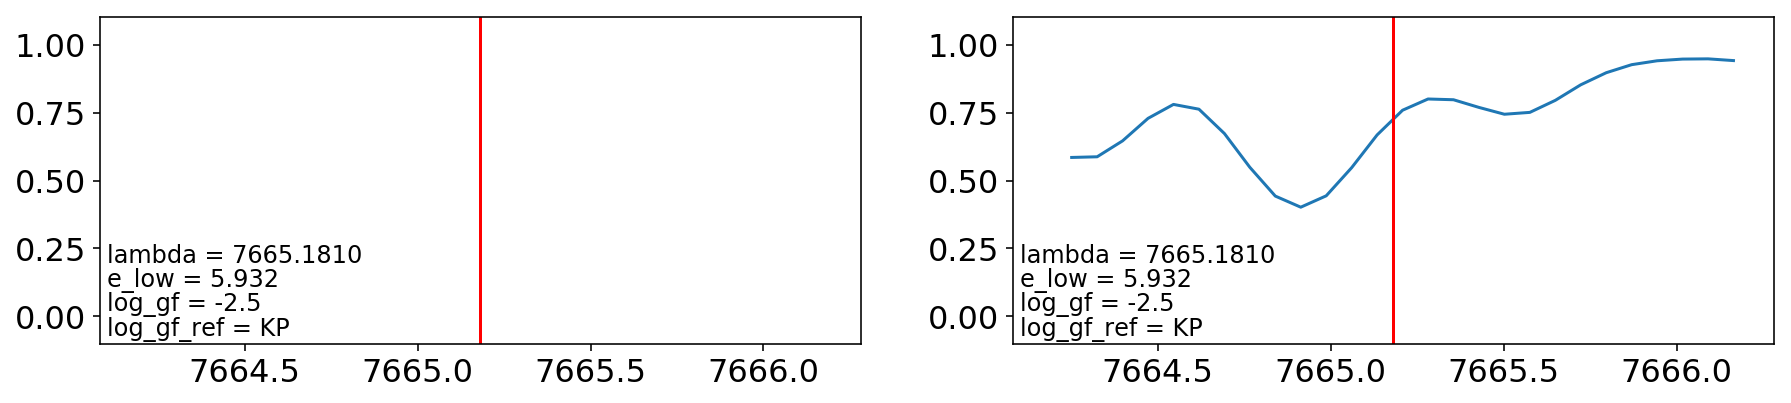

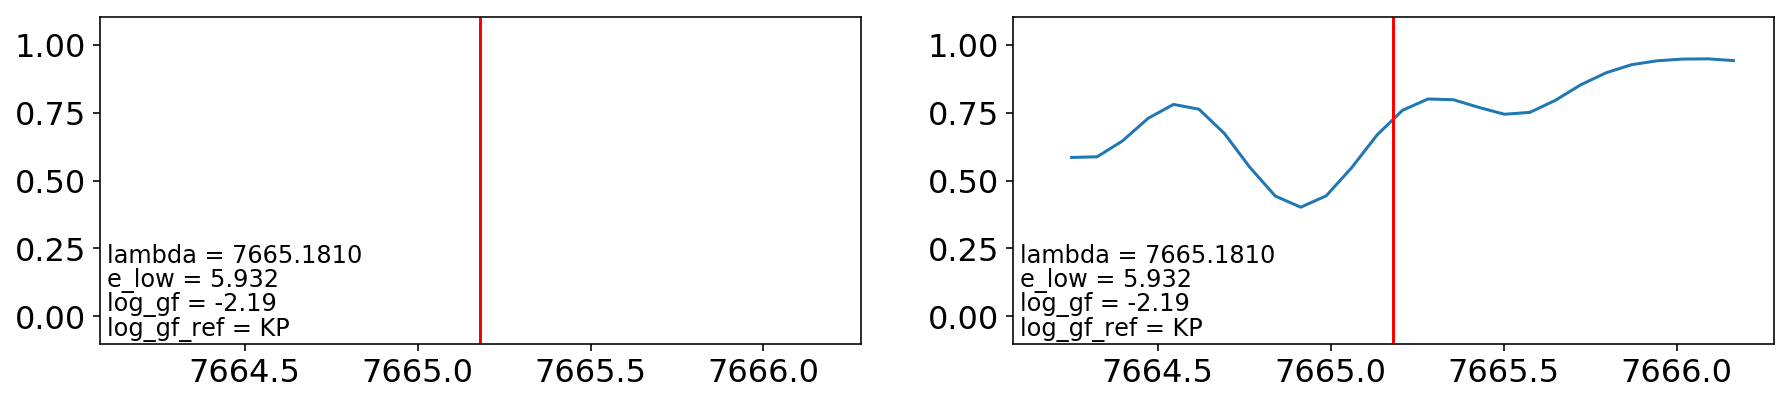

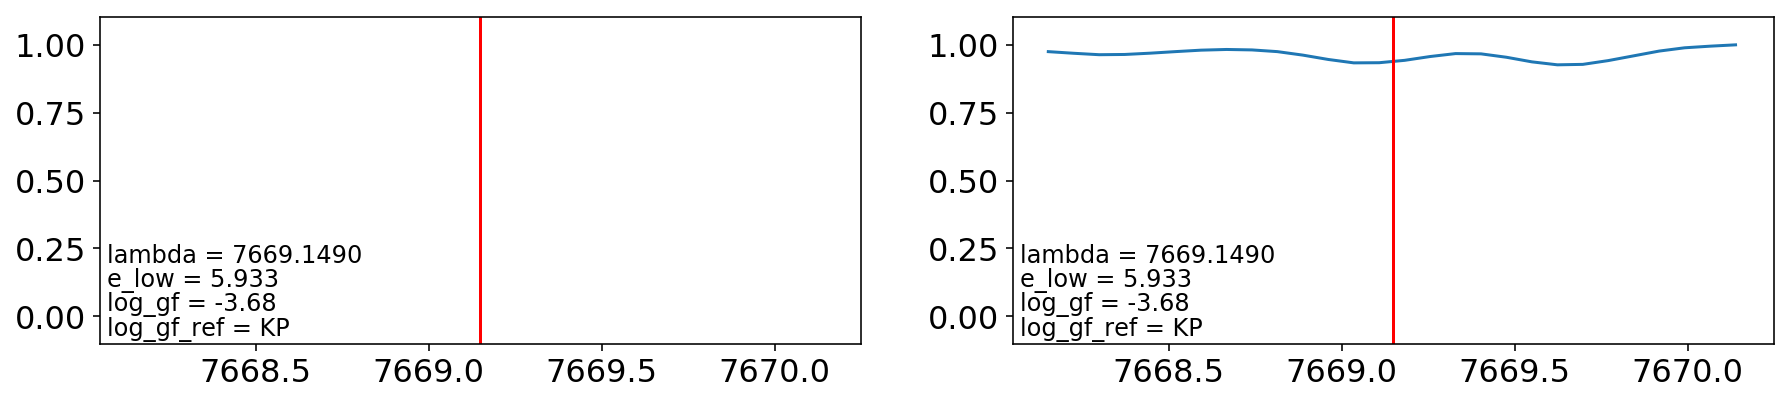

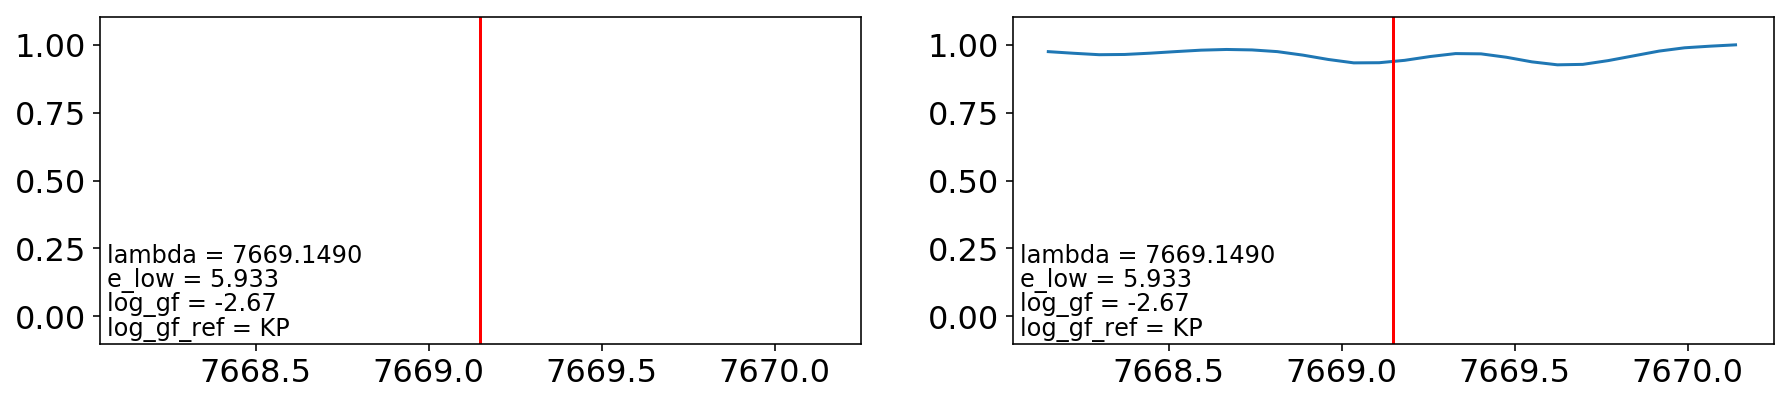

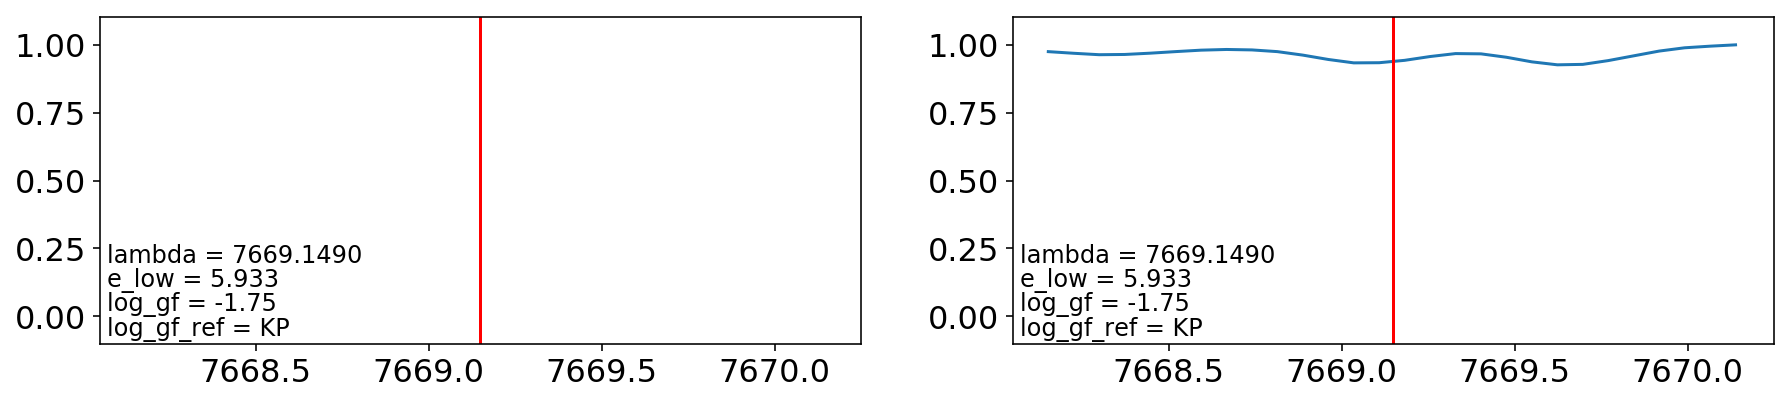

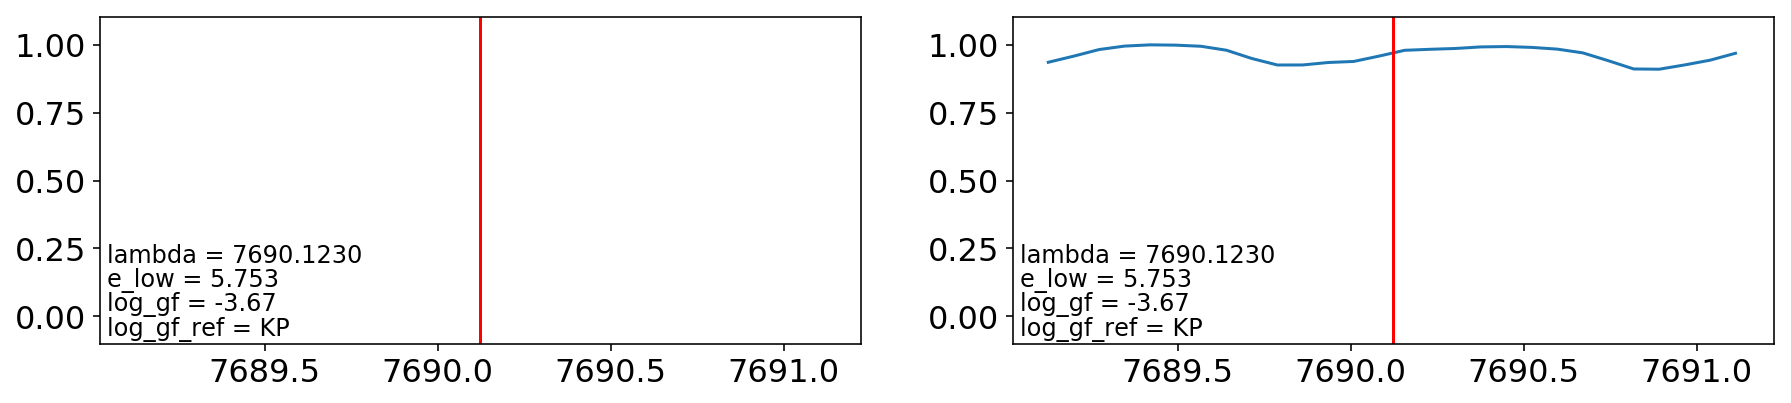

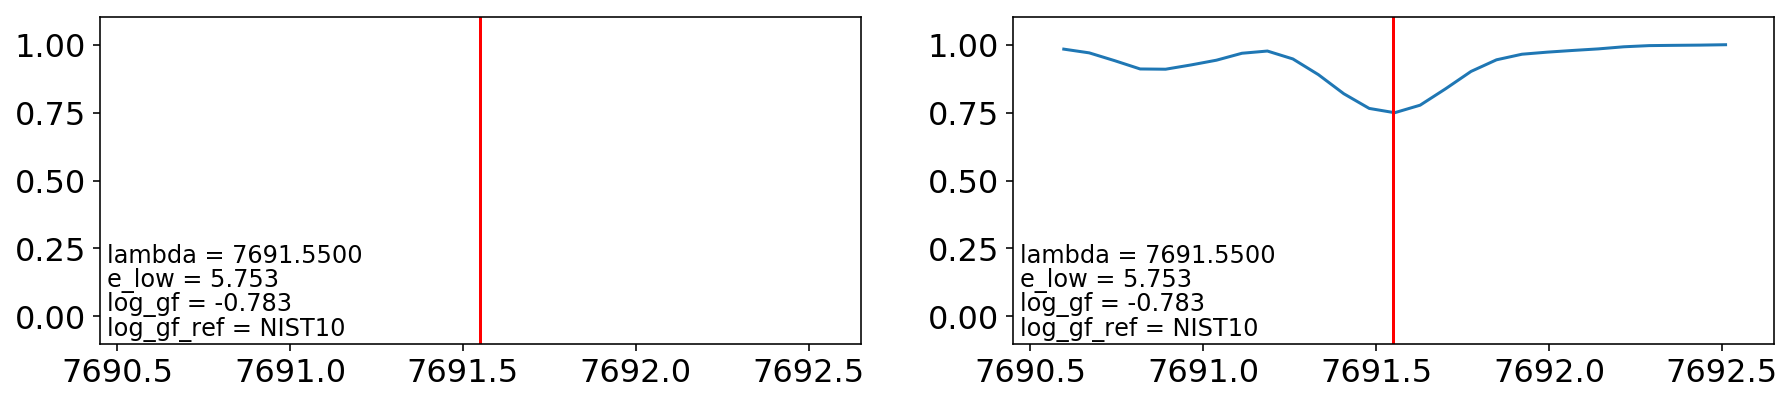

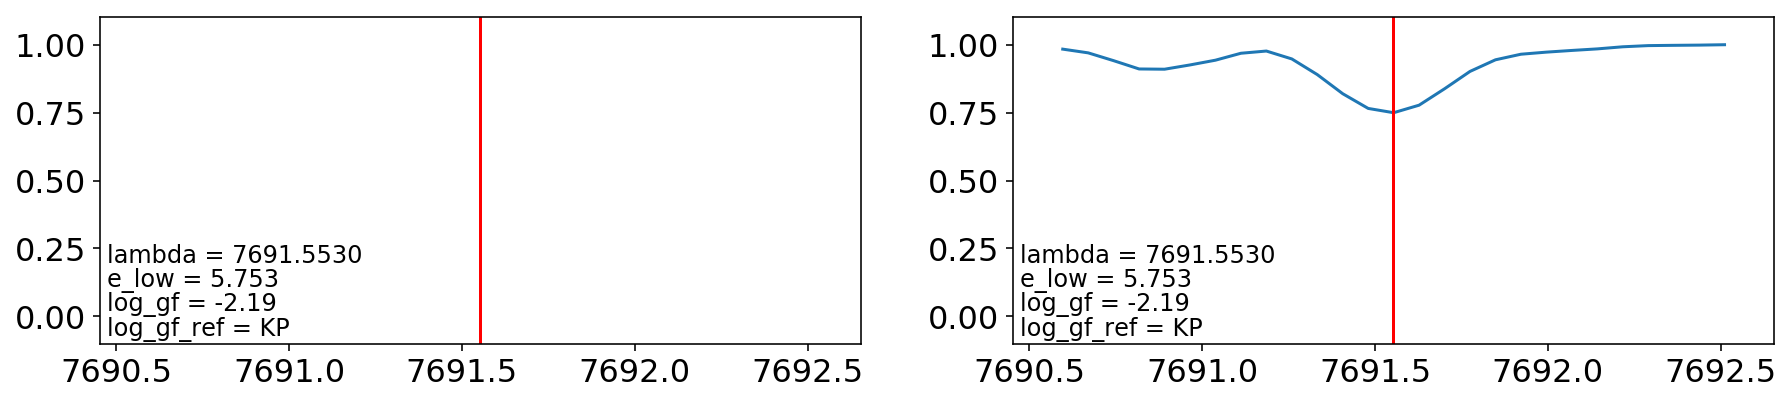

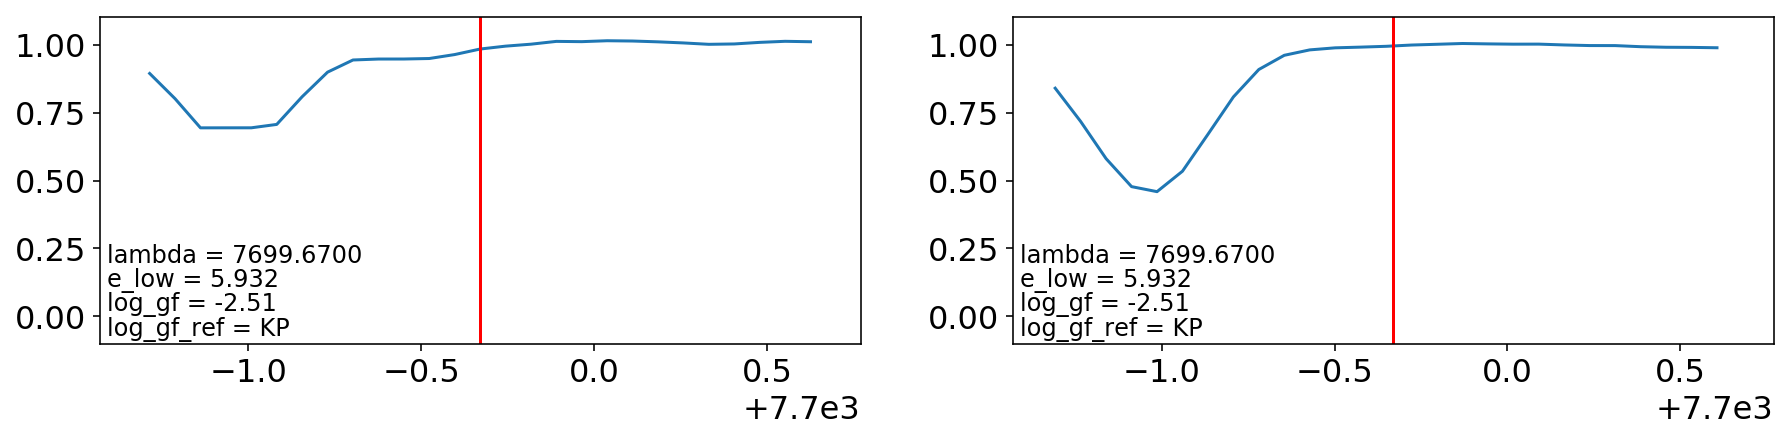

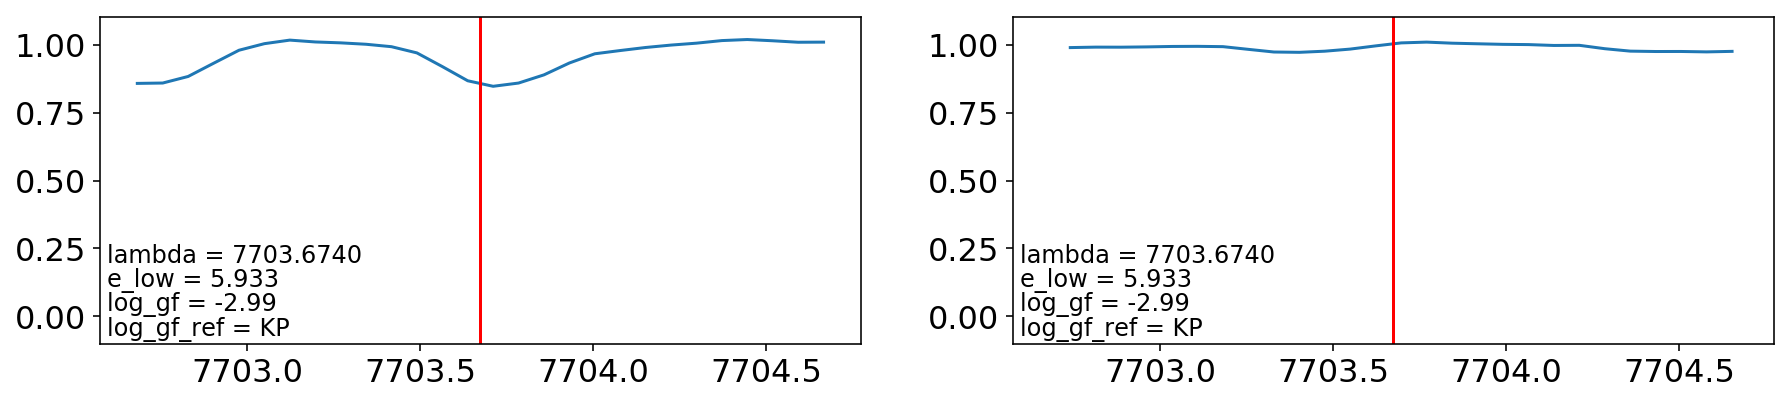

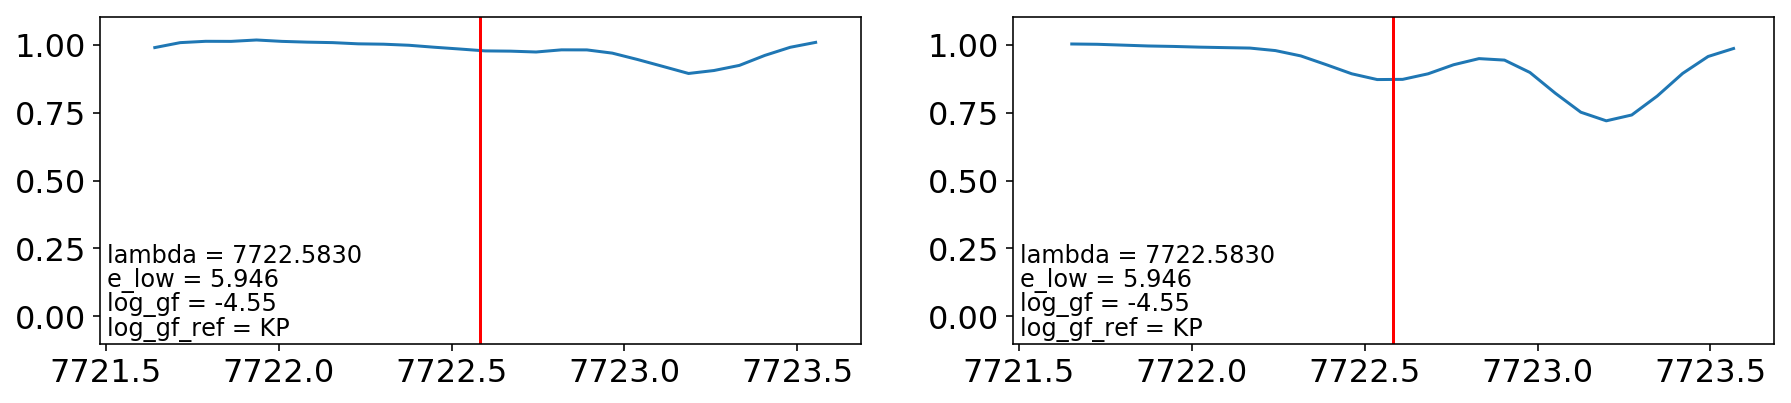

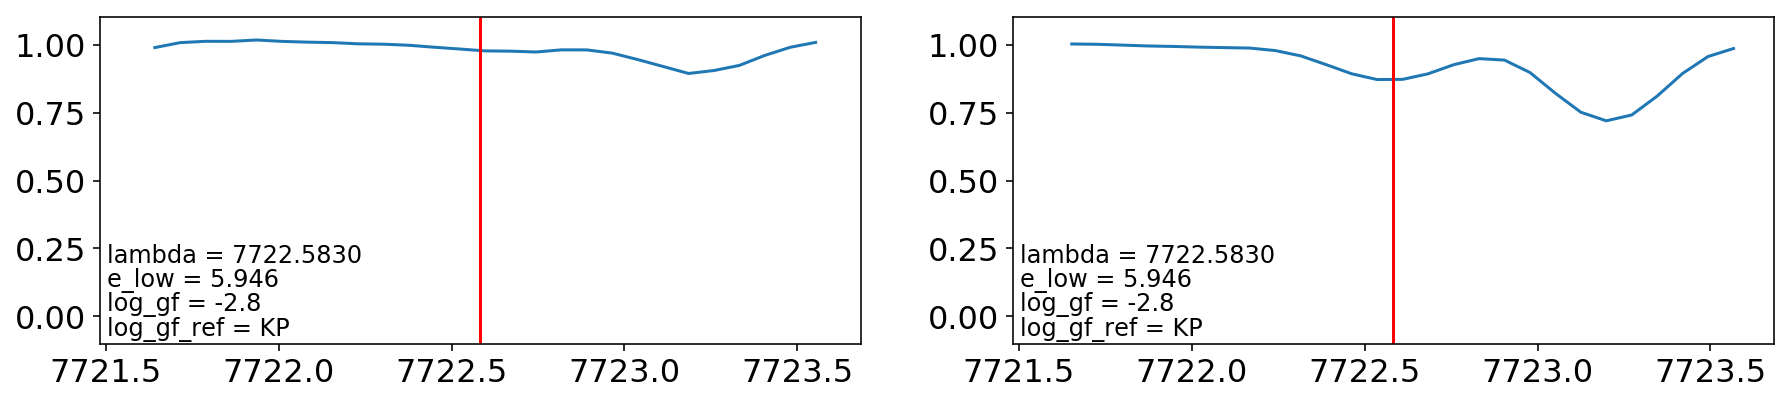

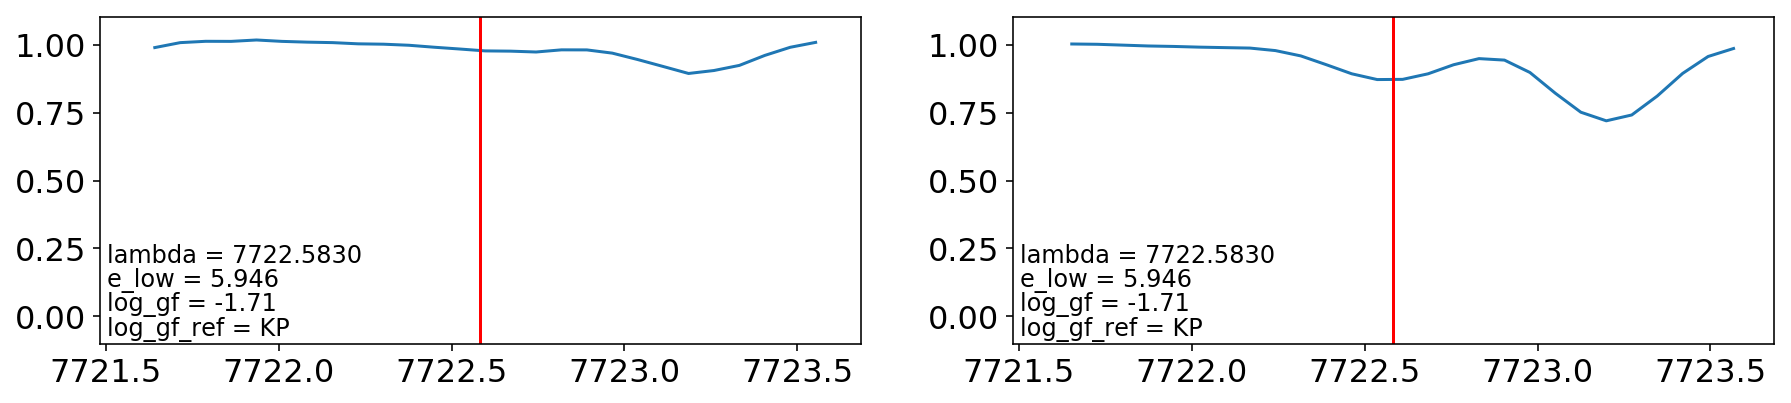

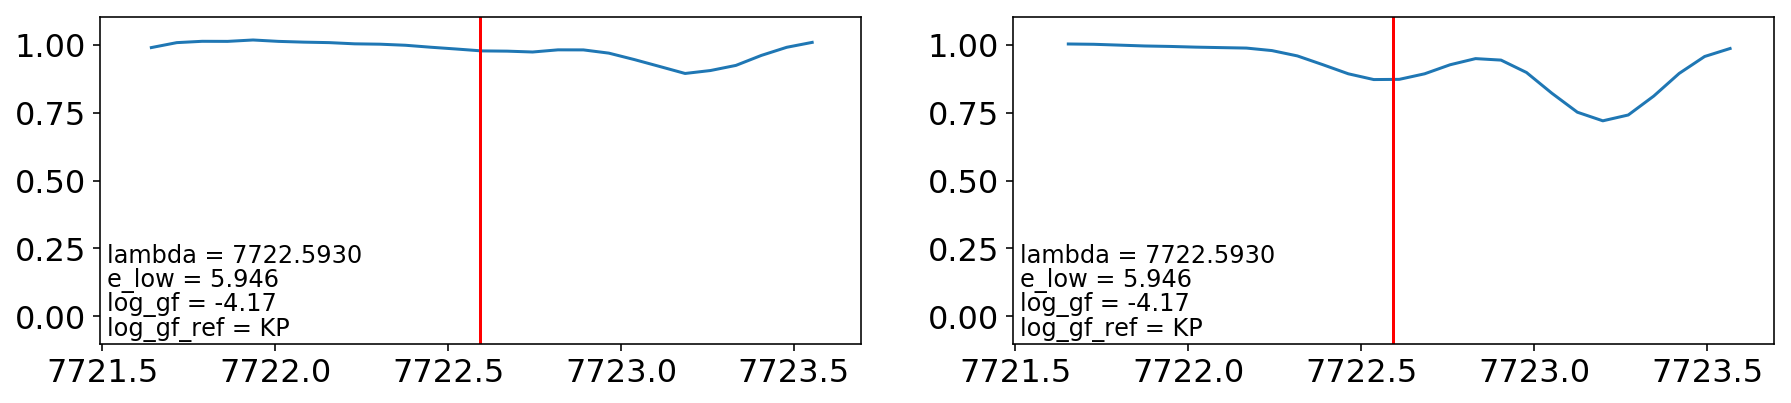

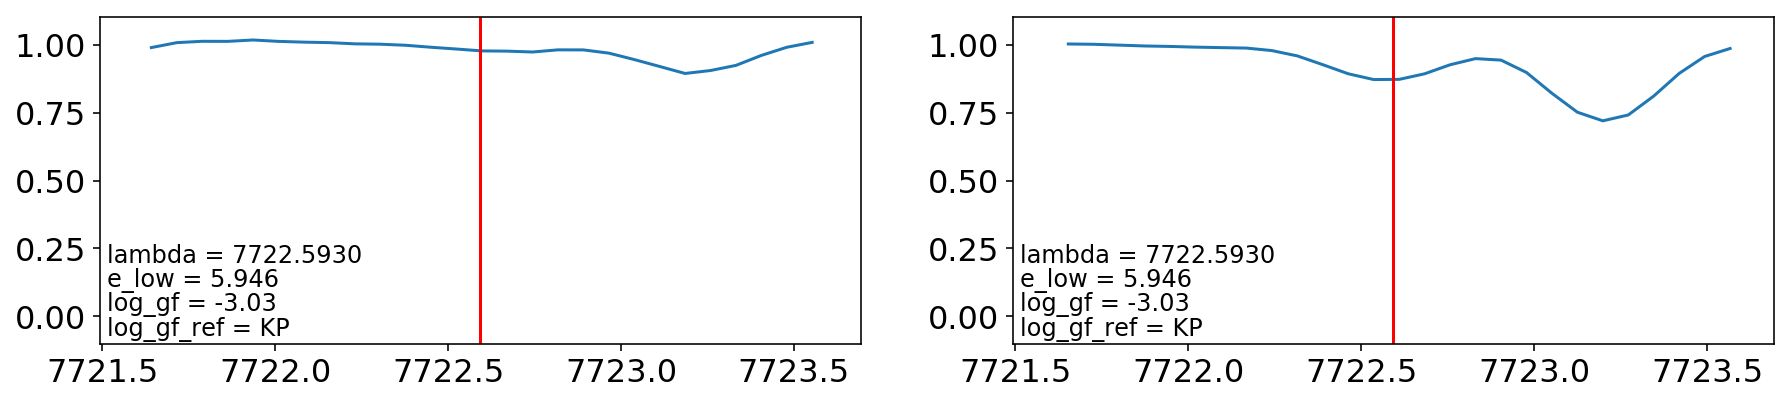

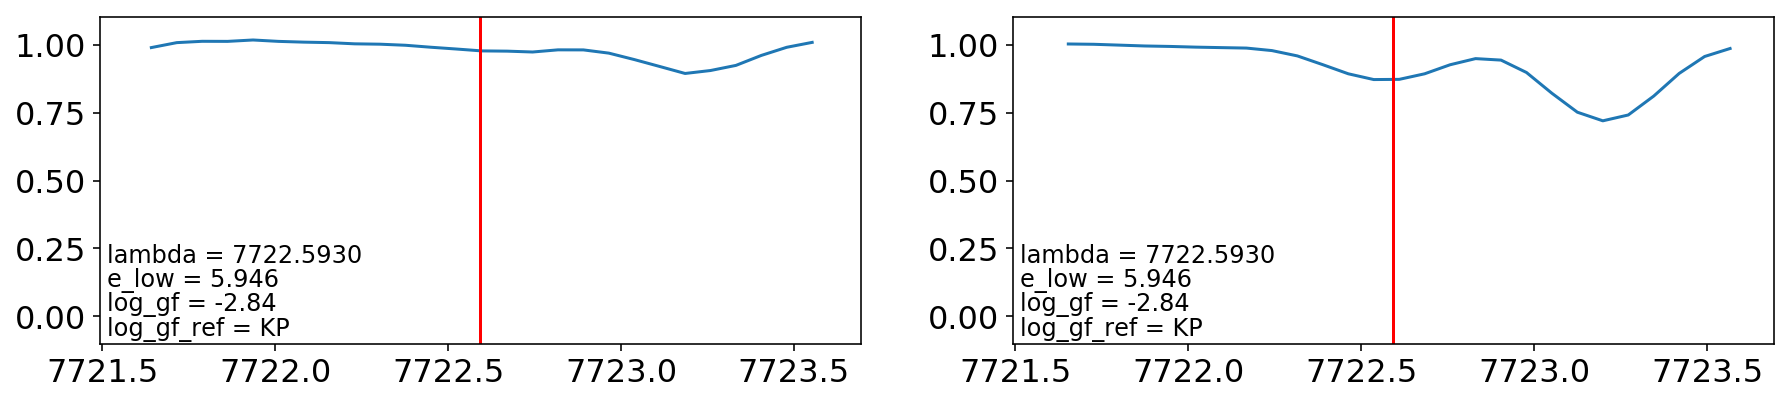

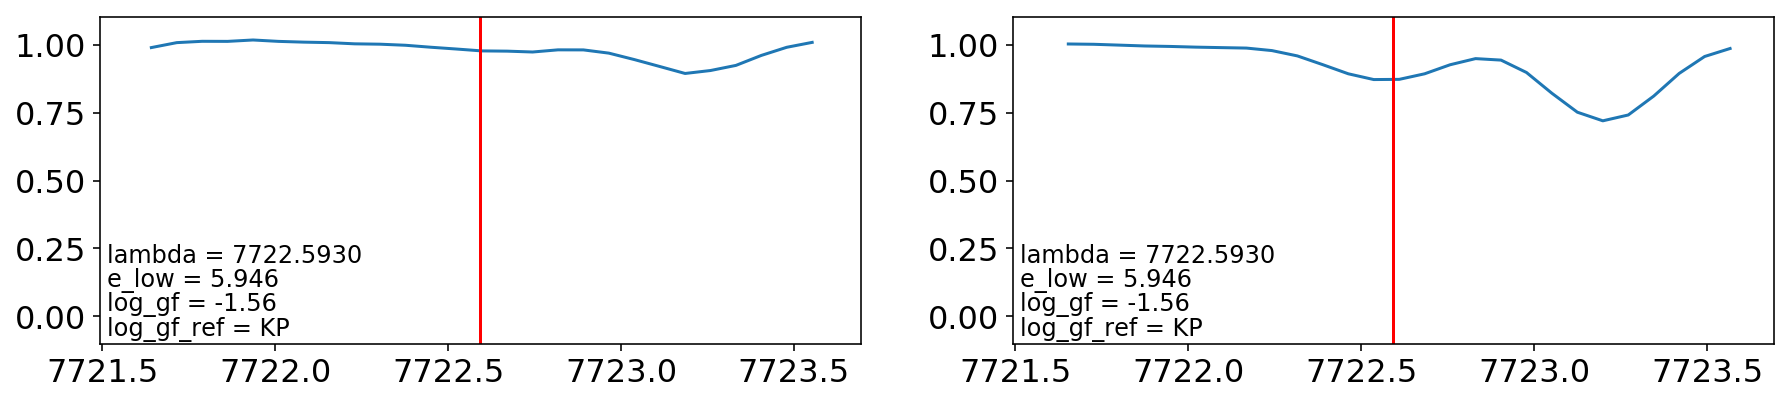

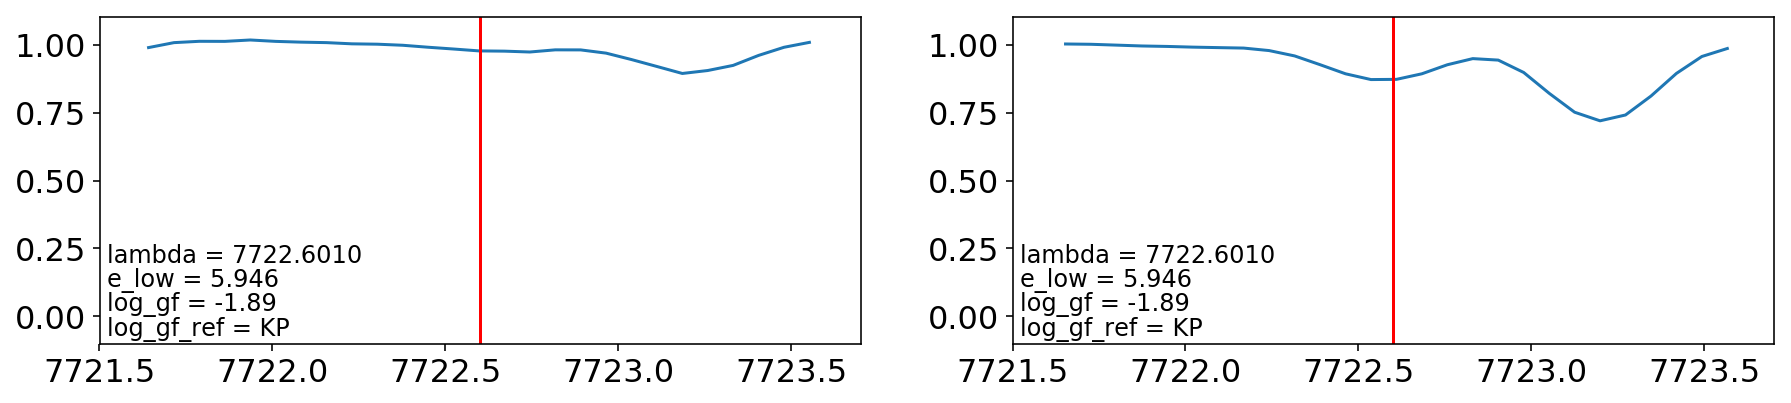

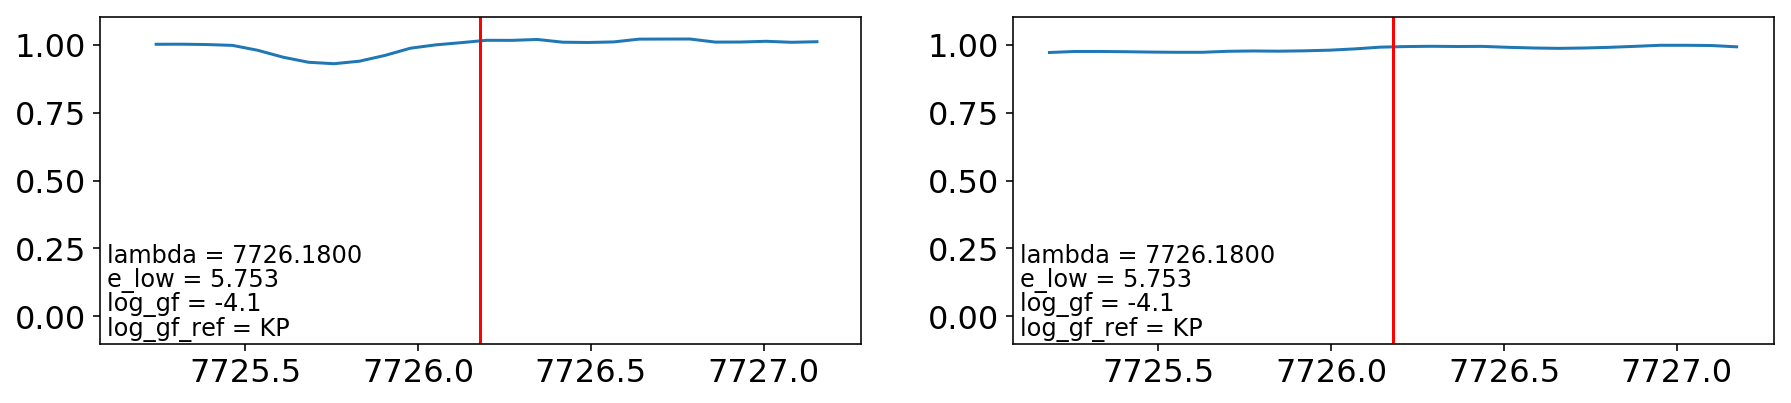

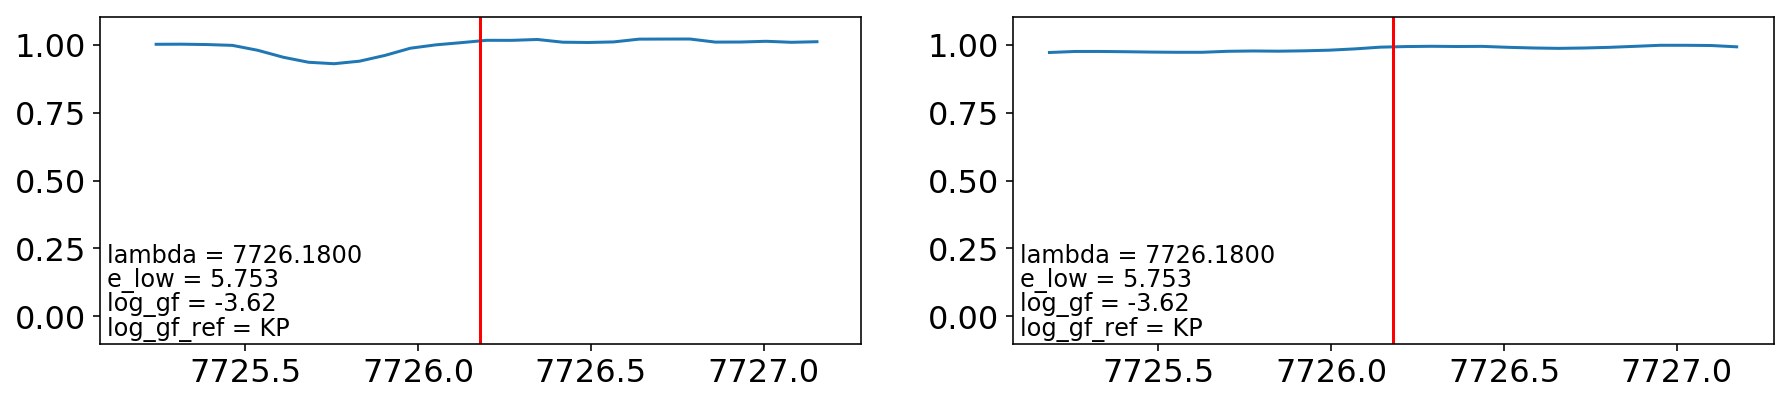

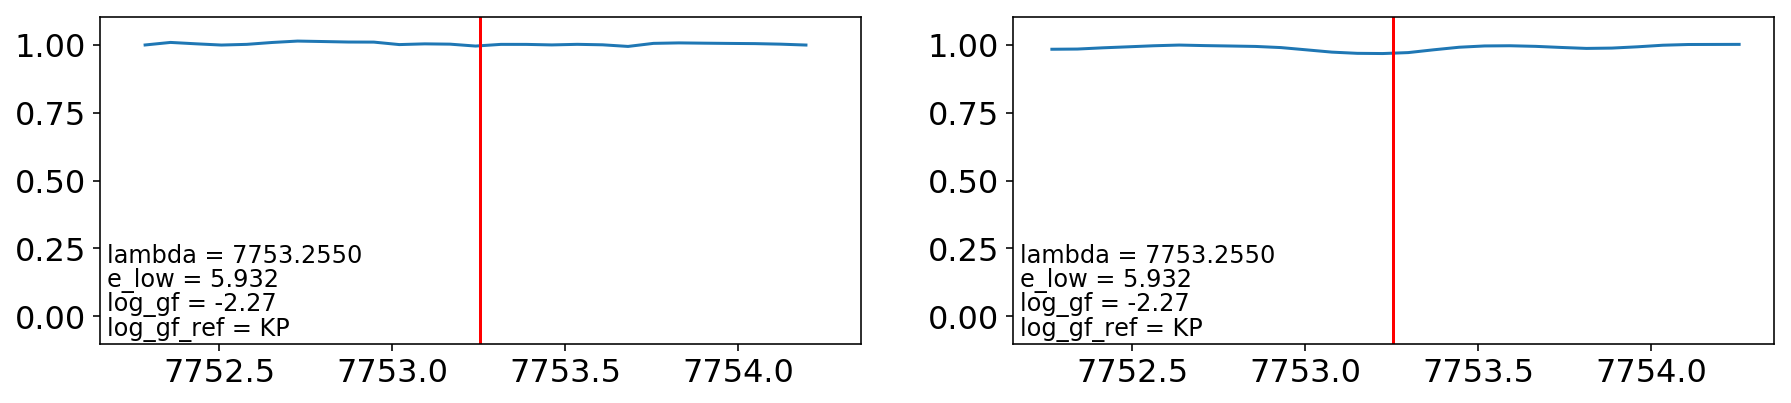

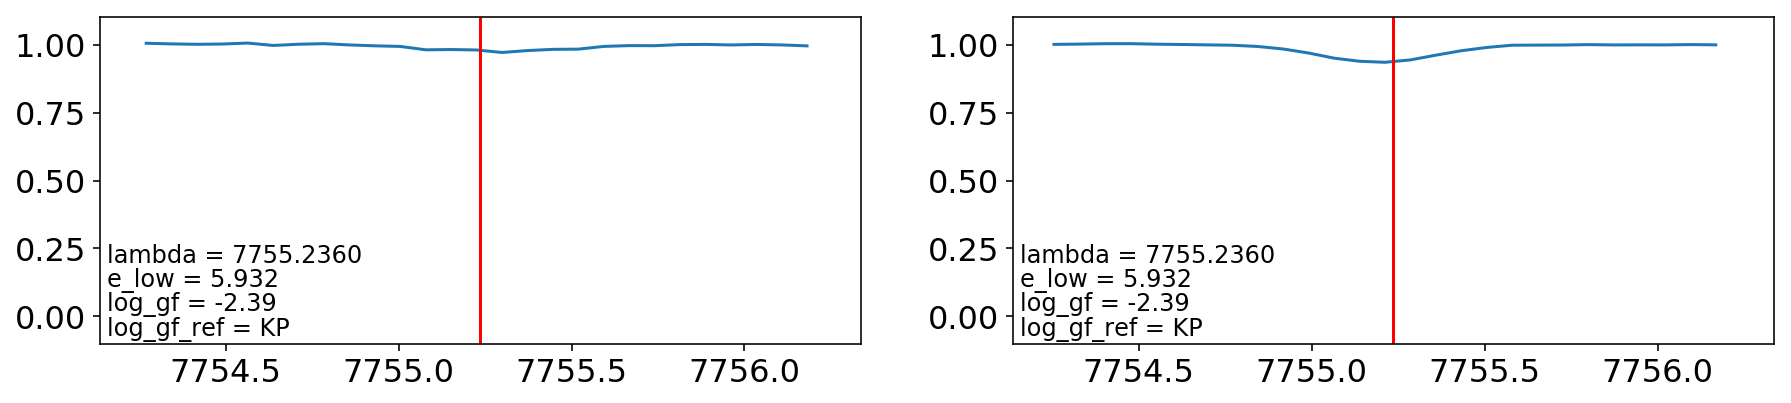

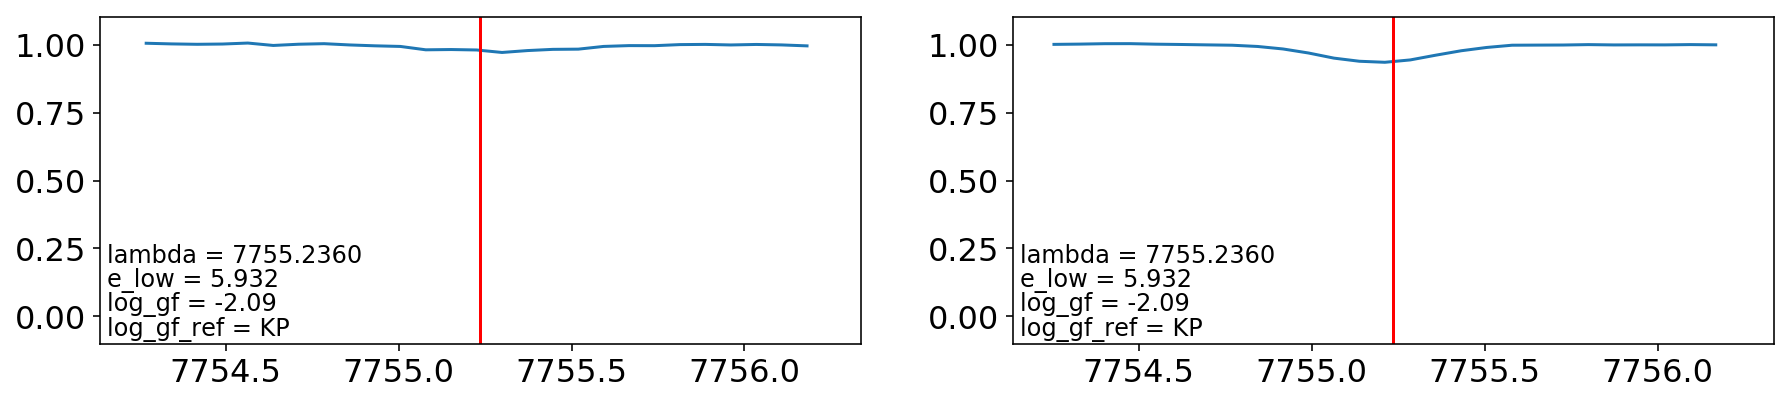

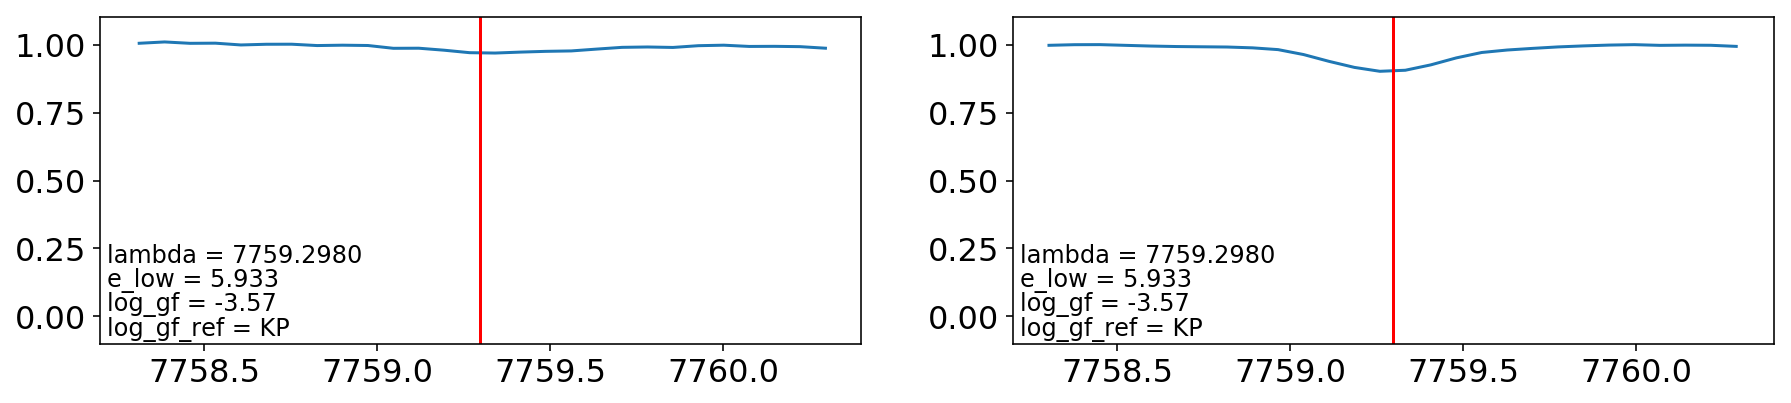

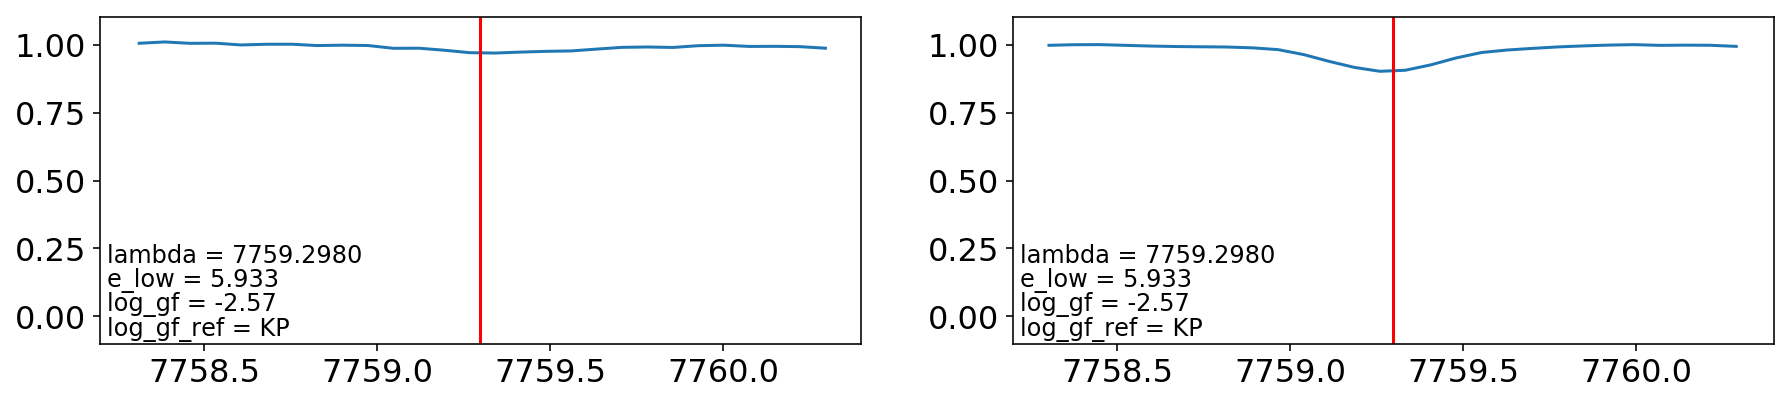

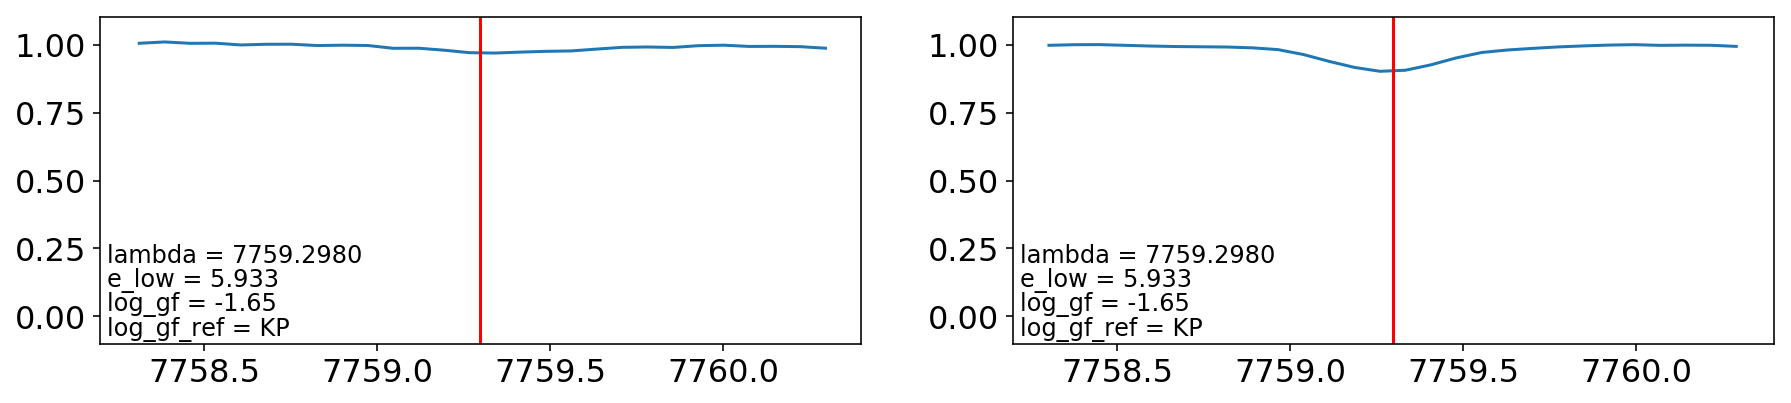

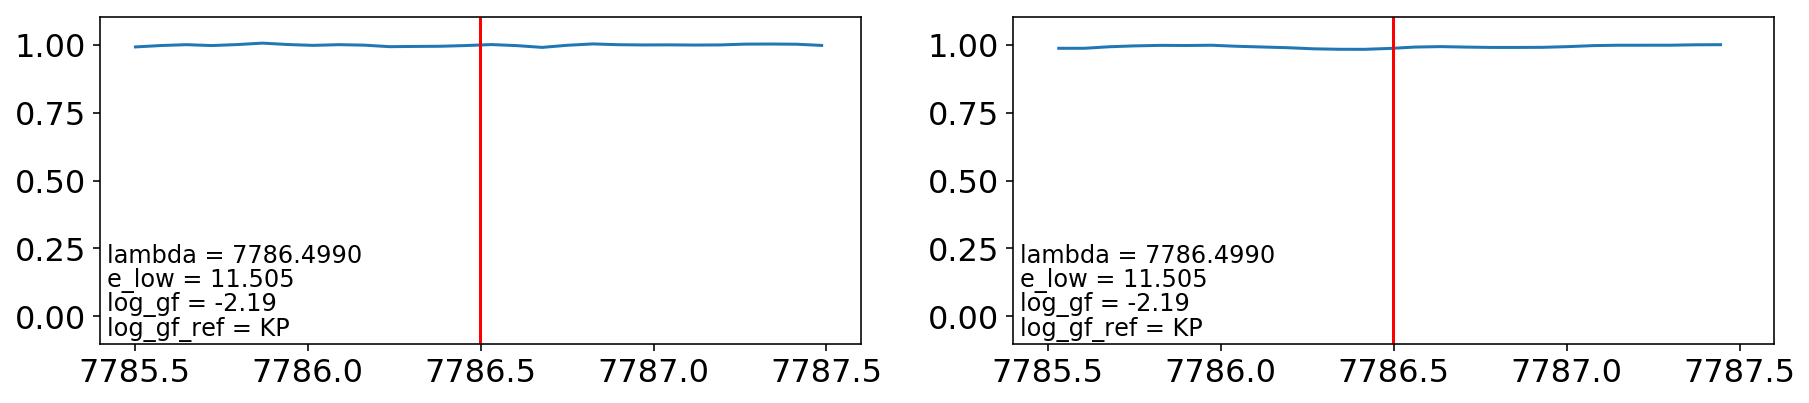

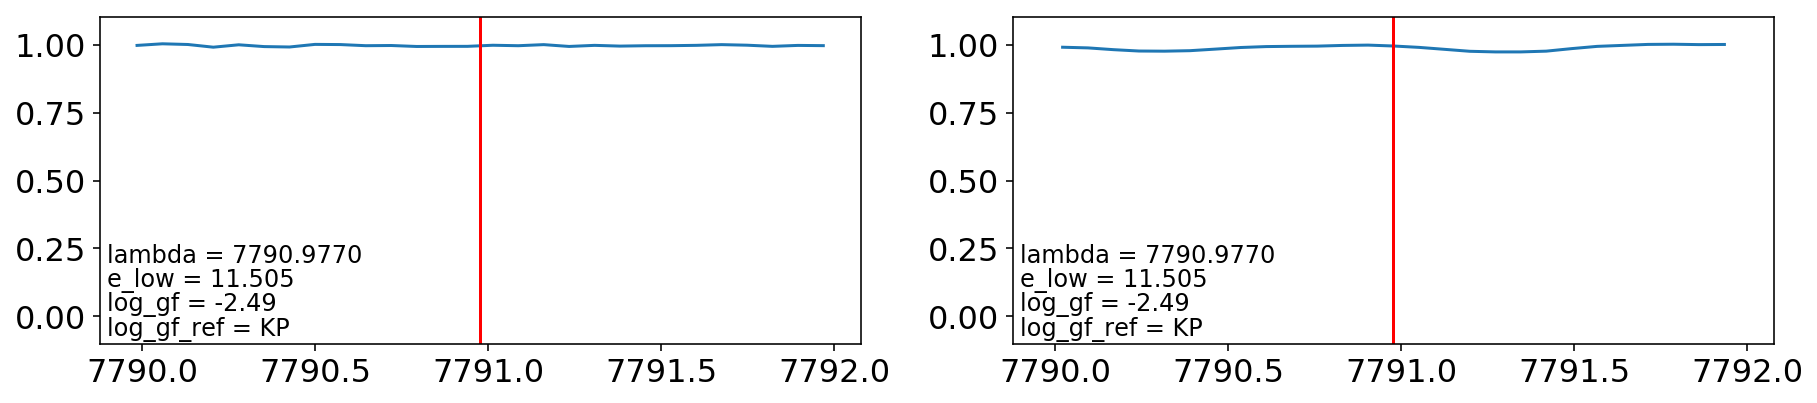

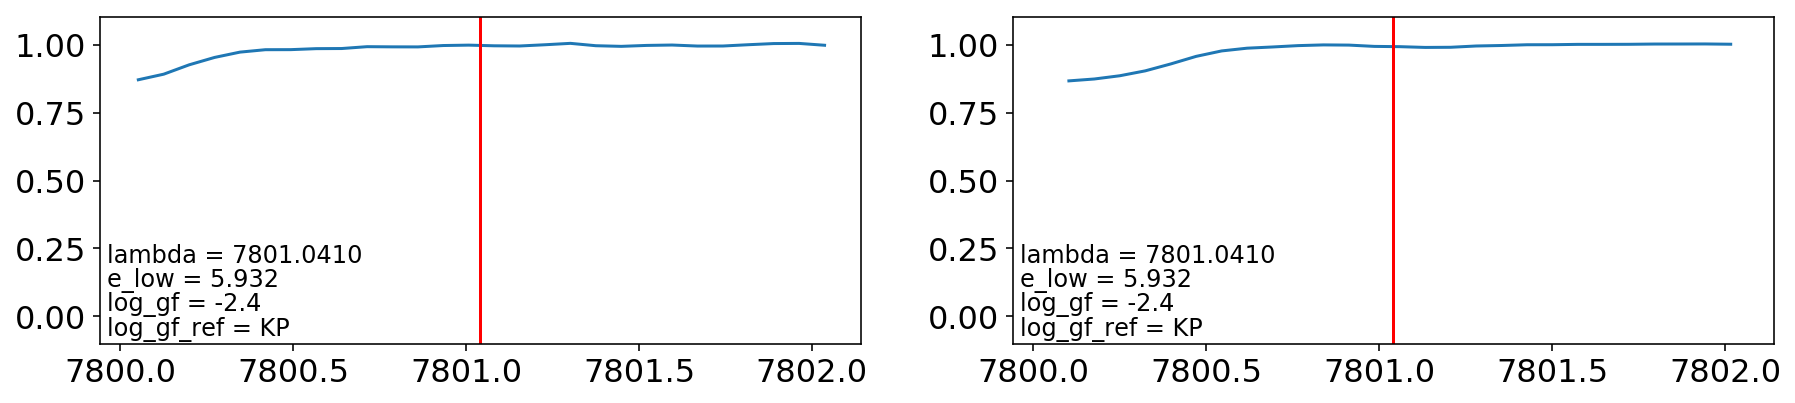

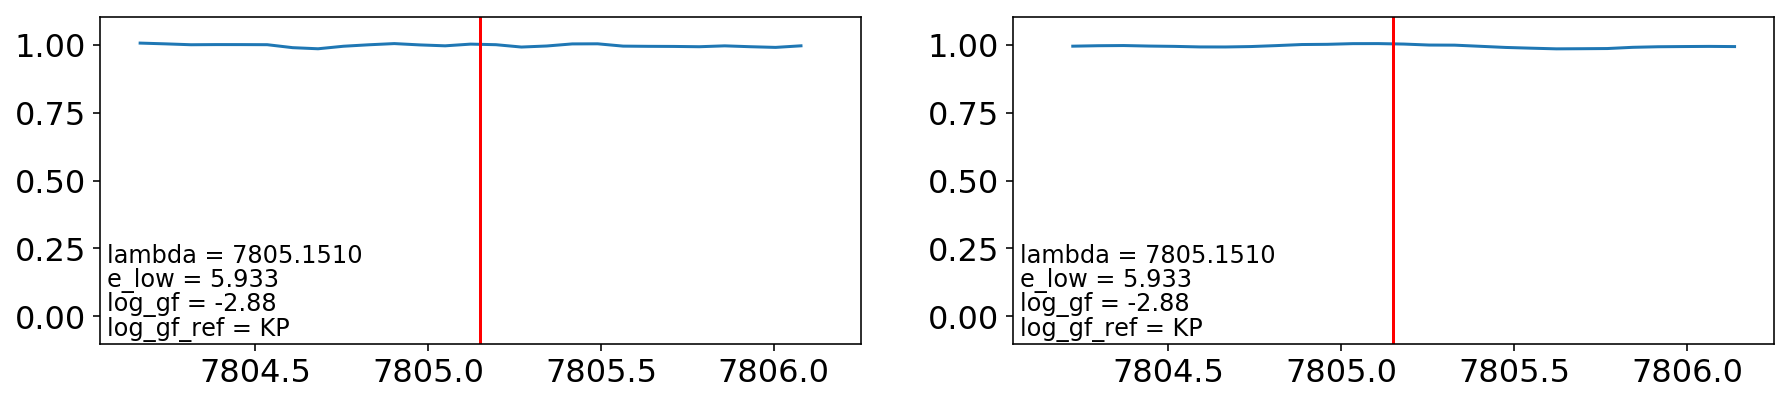

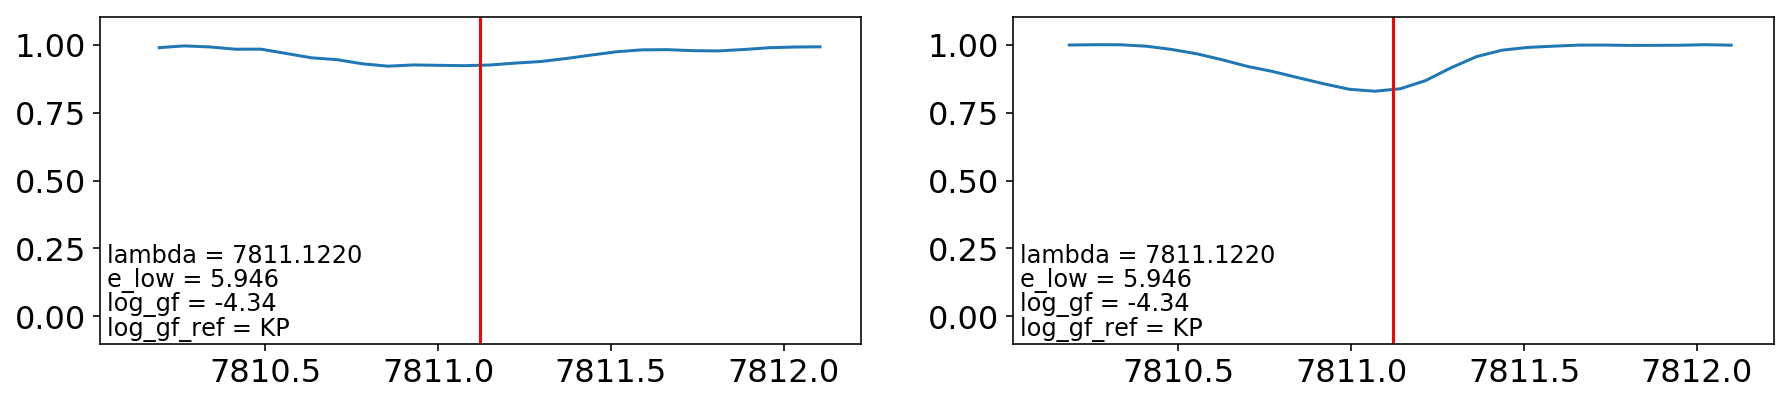

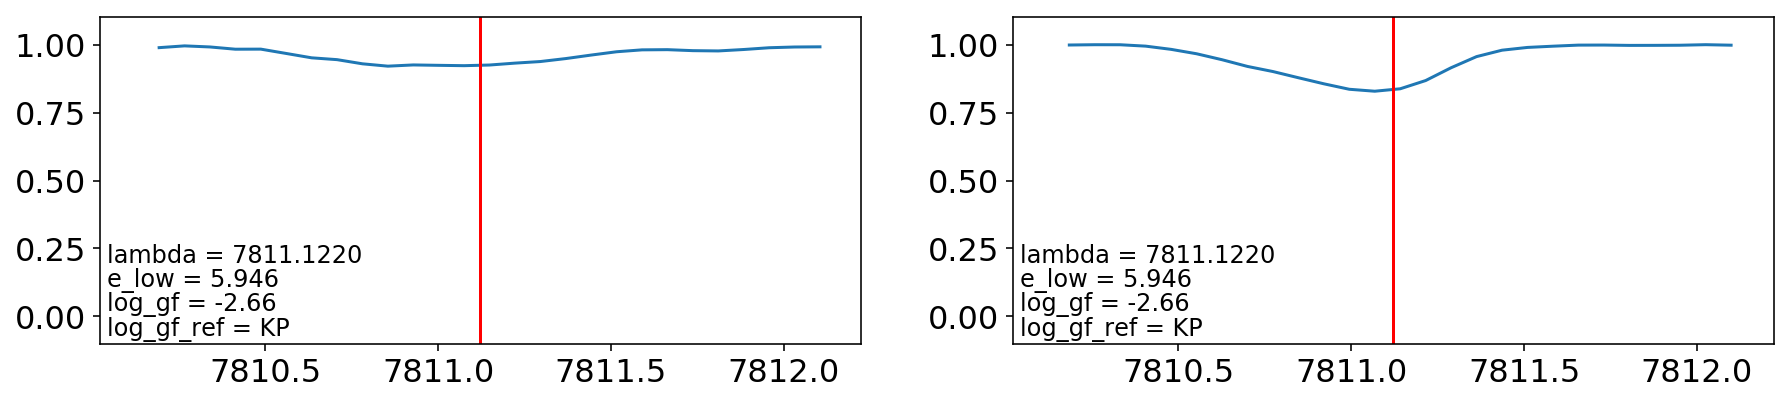

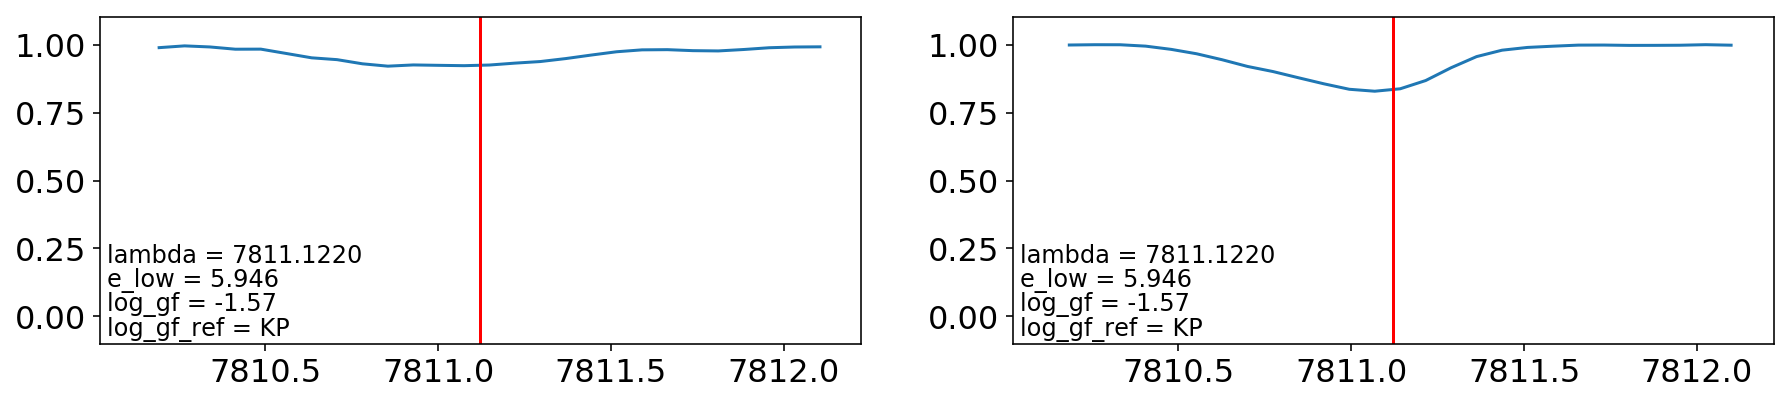

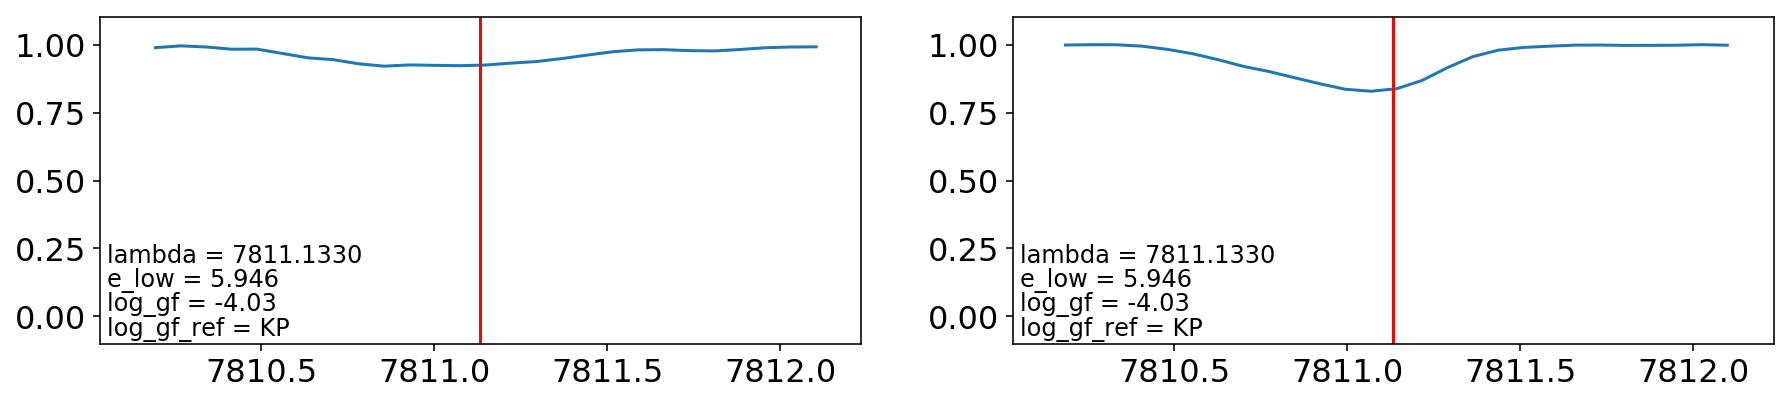

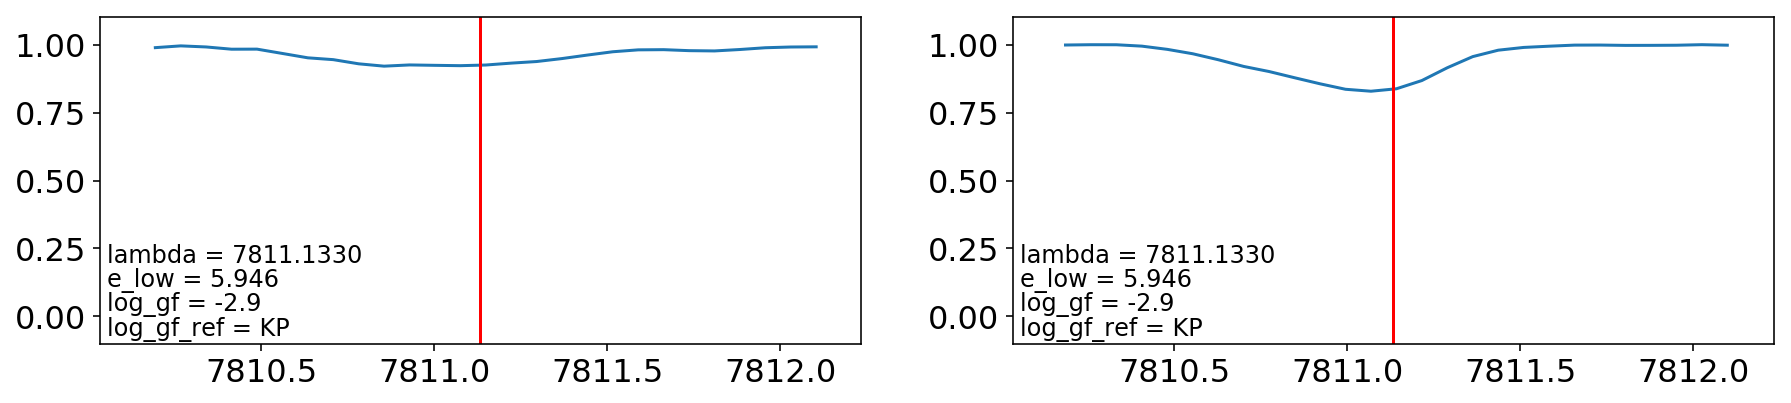

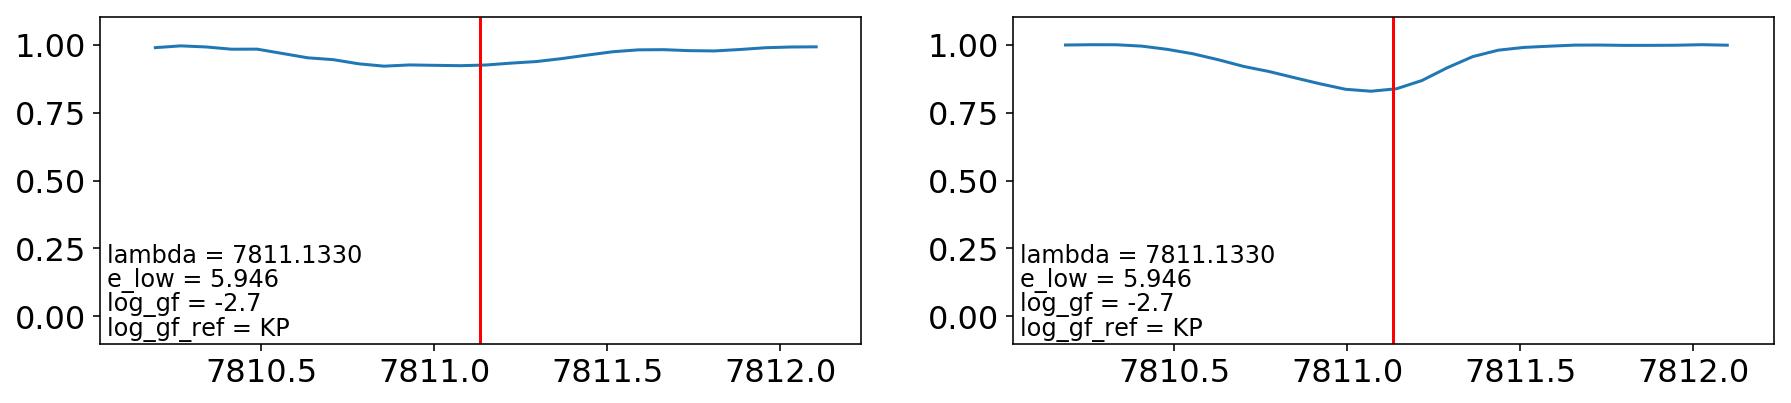

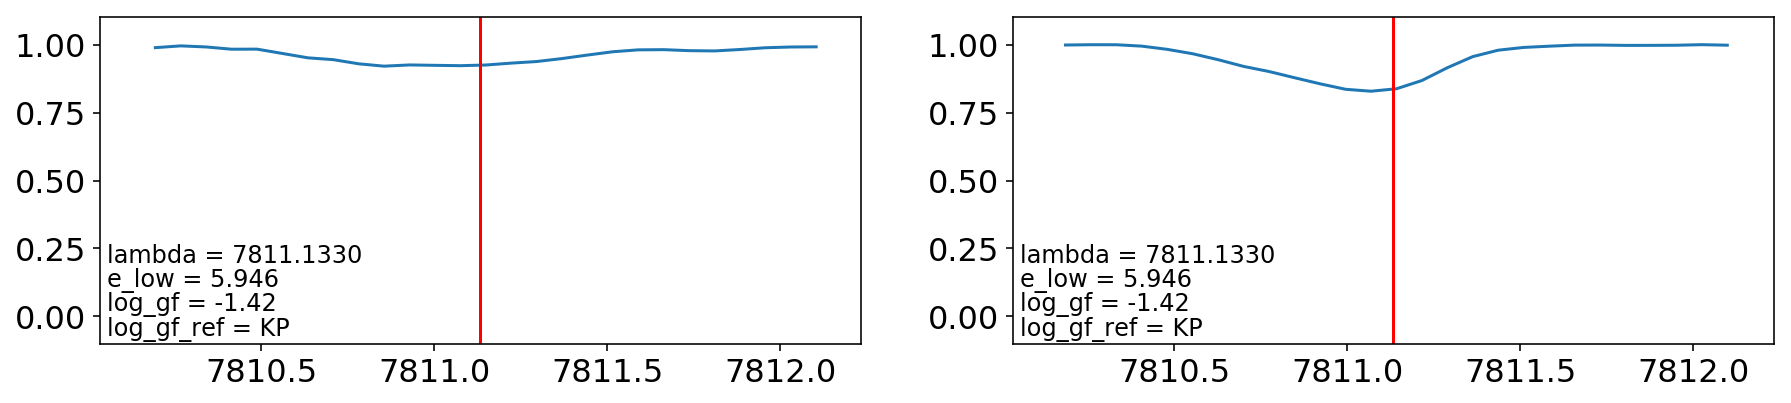

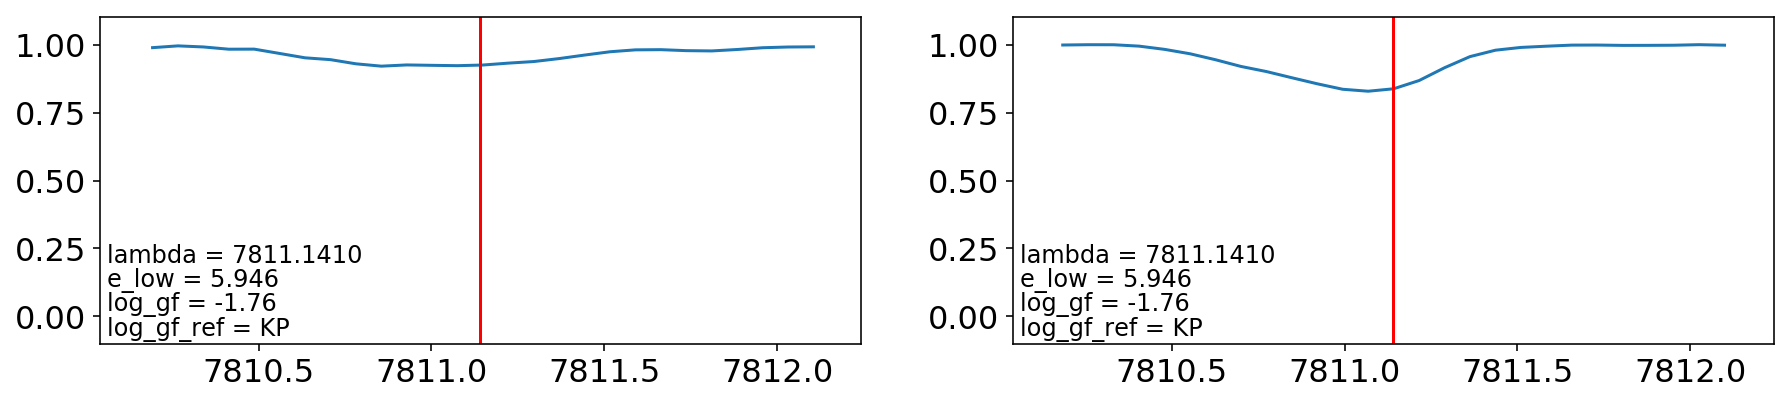

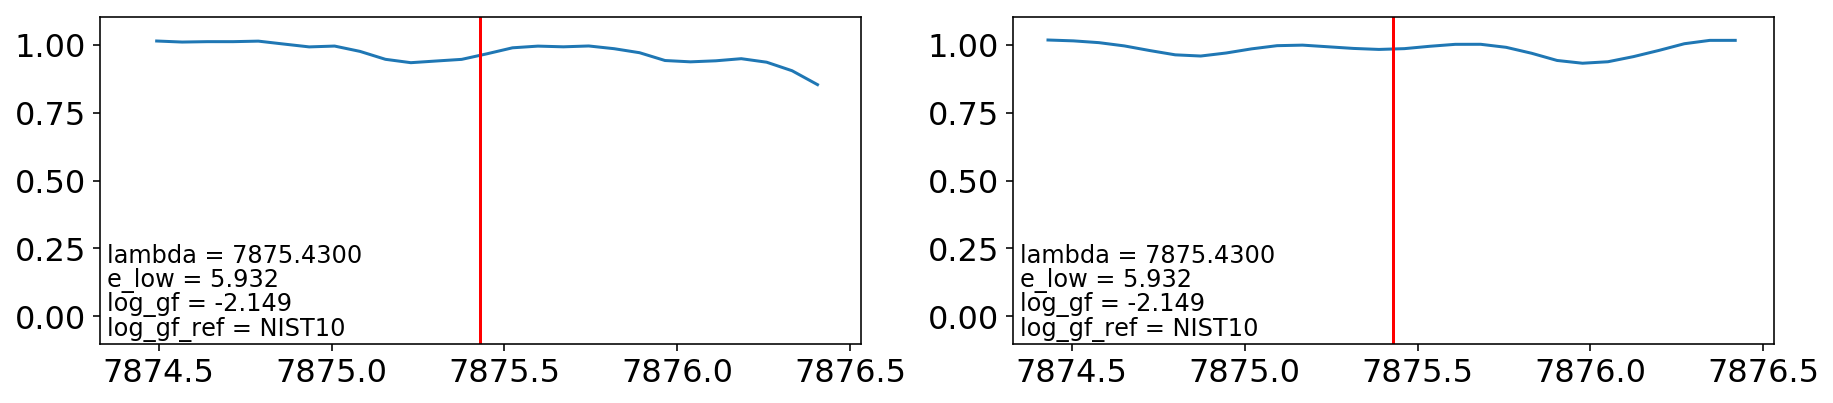

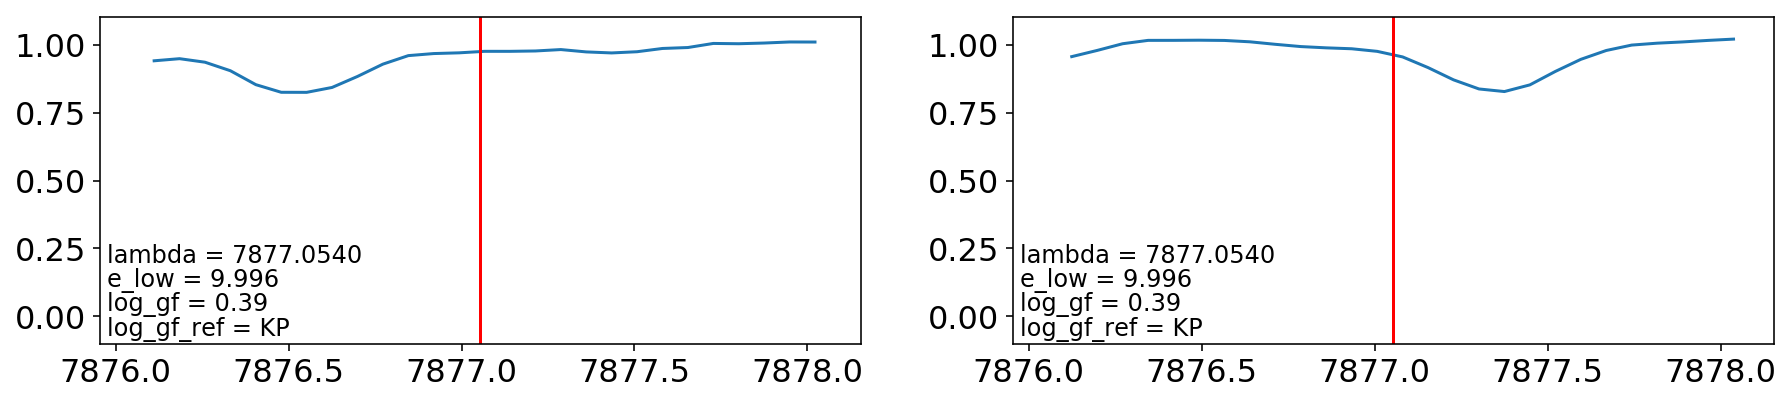

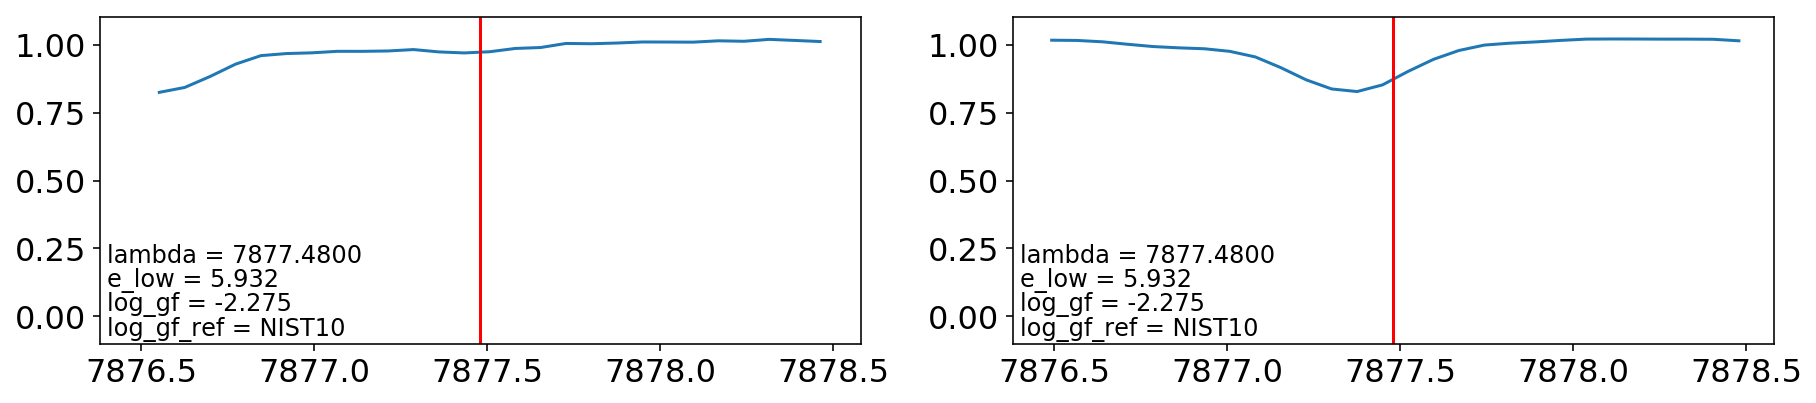

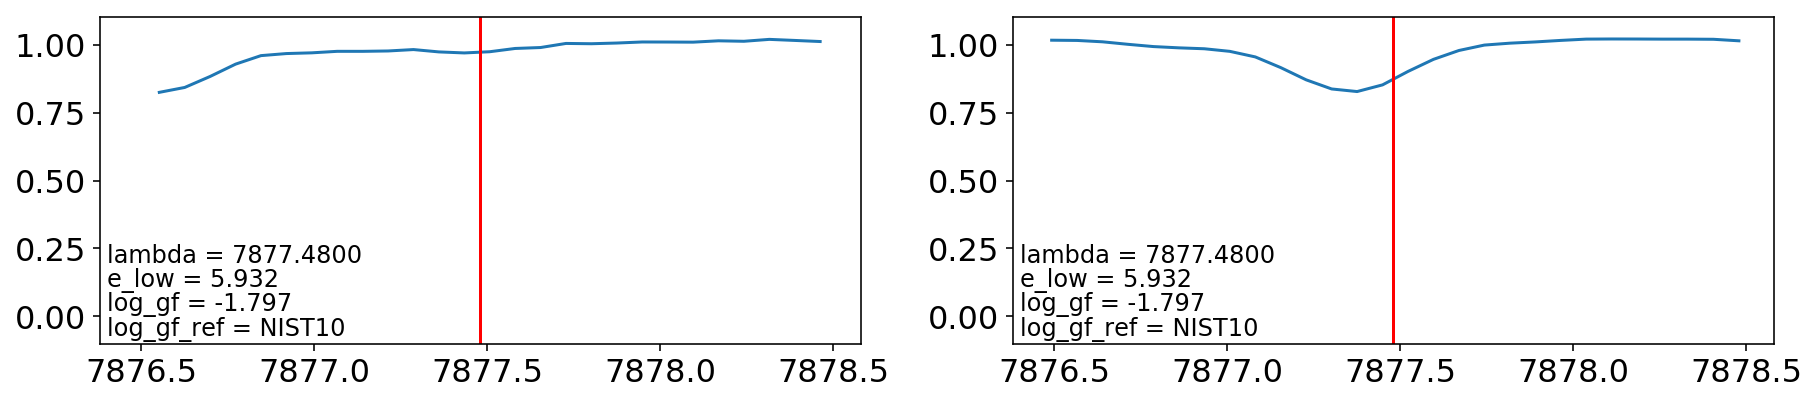

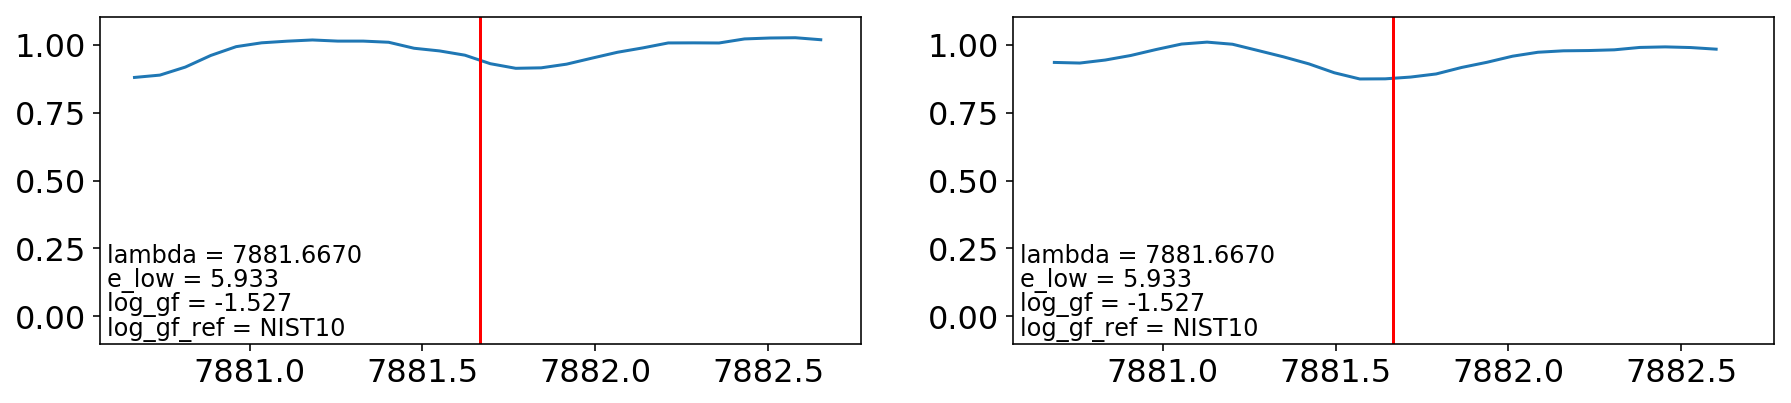

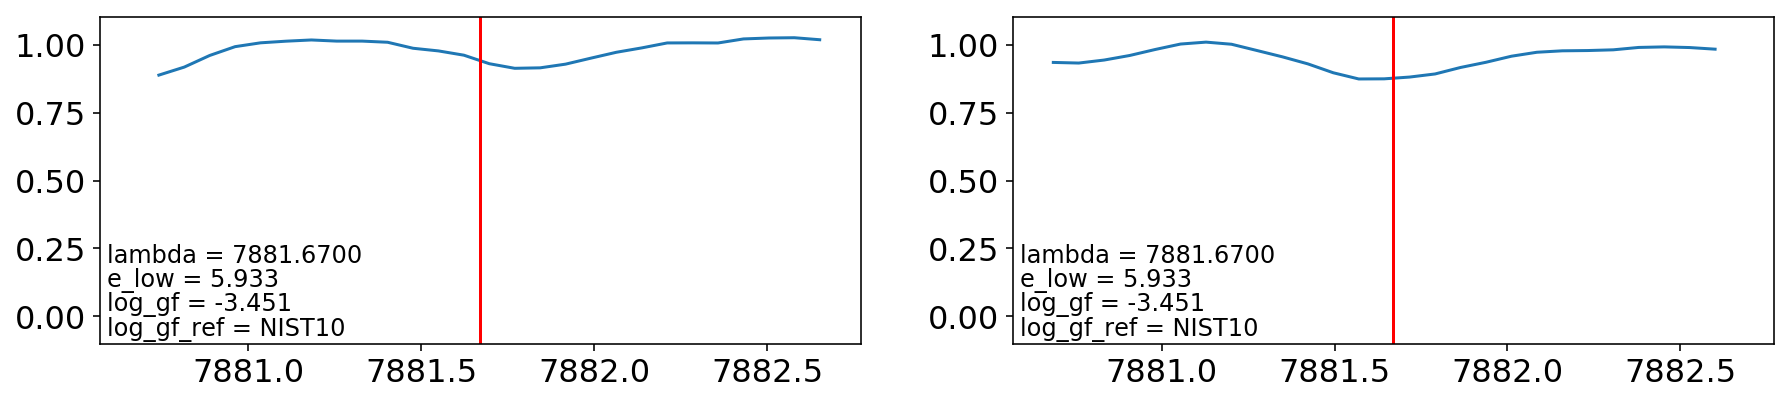

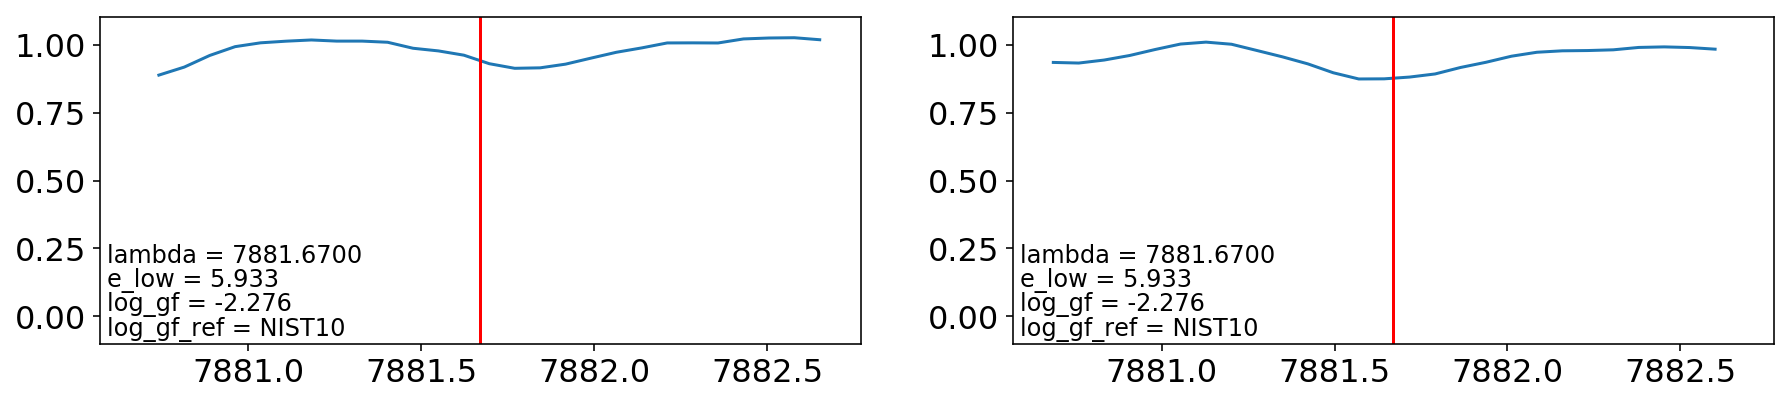

In [210]:
name_0 = 'Mg'
name_1 = '  '

plot_information(name_0, name_1, linelist, test_sobject_ids)